# **Wine Classification**🍷

| **Feature**                     | **Description**                                                                                   |
|-------------------------------------------|---------------------------------------------------------------------------------------------------|
| `alcohol`                                 | **Alcohol Content**: Percentage of alcohol in the wine, affecting taste and body.               |
| `malic_acid`                              | **Malic Acid**: Contributes to tartness and freshness; found in many fruits.                     |
| `ash`                                     | **Ash Content**: Inorganic residue indicating mineral content, influencing taste.                |
| `alcalinity_of_ash`                      | **Alkalinity**: Measures the ash's alkalinity, affecting acidity and balance.                   |
| `magnesium` (yeast health)                               | **Magnesium**: Essential mineral influencing taste and yeast health during fermentation.         |
| `total_phenols` (aging)                          | **Total Phenolics**: Includes tannins and flavonoids, affecting color, flavor, and aging.      |
| `flavanoids` (color and taste)                             | **Flavanoid Content**: Antioxidants contributing to color and taste, especially in red wines.   |
| `nonflavanoid_phenols` (stability & flavour)                  | **Non-Flavanoid Phenolics**: Other phenolic compounds influencing flavor and stability.          |
| `proanthocyanins` (astrigency (after taste))                        | **Proanthocyanins**: Tannins from grape skins affecting astringency and color.                  |
| `color_intensity`                         | **Color Intensity**: Indicates the concentration of flavors and tannins; darker wines are richer.|
| `hue`                                     | **Hue**: Color measurement providing insights into age and varietal characteristics.             |
| `od280/od315_of_diluted_wines`          | **Absorbance Ratio**: Indicates phenolic content and quality assessment.                        |
| `proline` (aroma)                                 | **Proline**: Amino acid influencing flavor and aroma, varying by grape variety.                  |
| `Target`                                  | **Quality Indicator**: Categorical variable indicating wine quality or type for classification.  |


<div style="background-color:red; font-size:30px; border-radius:10px; padding:23px; text-align:center; font-family:'Poppins'; color:white;" > 1 | Exploratory Data Analyisis </div>

<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" > Univariate Analysis</div>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('dataset/wine.csv')

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" > Univariate Analysis</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  Targe

In [7]:
print(f'Total Row: {df.shape[0]}')
print(f'Total Column : {df.shape[1]}')

Total Row: 178
Total Column : 14


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


- Most of column have a small range from 0 to 15
- `proline` have range from 278 to 1680 shich quite large if compare to other
- magnesium have range from 70 to 162

**Conclusion:** most of column have same range, but only proline is have high range, we can determine to scaling if proline if we use it in modeling

<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" >Inconsistencies Analysis</div>

<div style="background-color:white; font-size:15px; color:red; border-radius:15px; padding:23px; font-family:'Poppins';" >Checking missing value 📊</div>

In [9]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
dtype: int64

There are no missing value

<div style="background-color:white; font-size:15px; color:red; border-radius:15px; padding:23px; font-family:'Poppins';" >Duplication checking 📊</div>

In [10]:
df.duplicated().sum()

0

There are no duplication

In [11]:
plt.rcParams['figure.figsize'] = (20, 15)

<div style="background-color:white; font-size:15px; color:red; border-radius:15px; padding:23px; font-family:'Poppins';" >Outliers Analysis 📊</div>

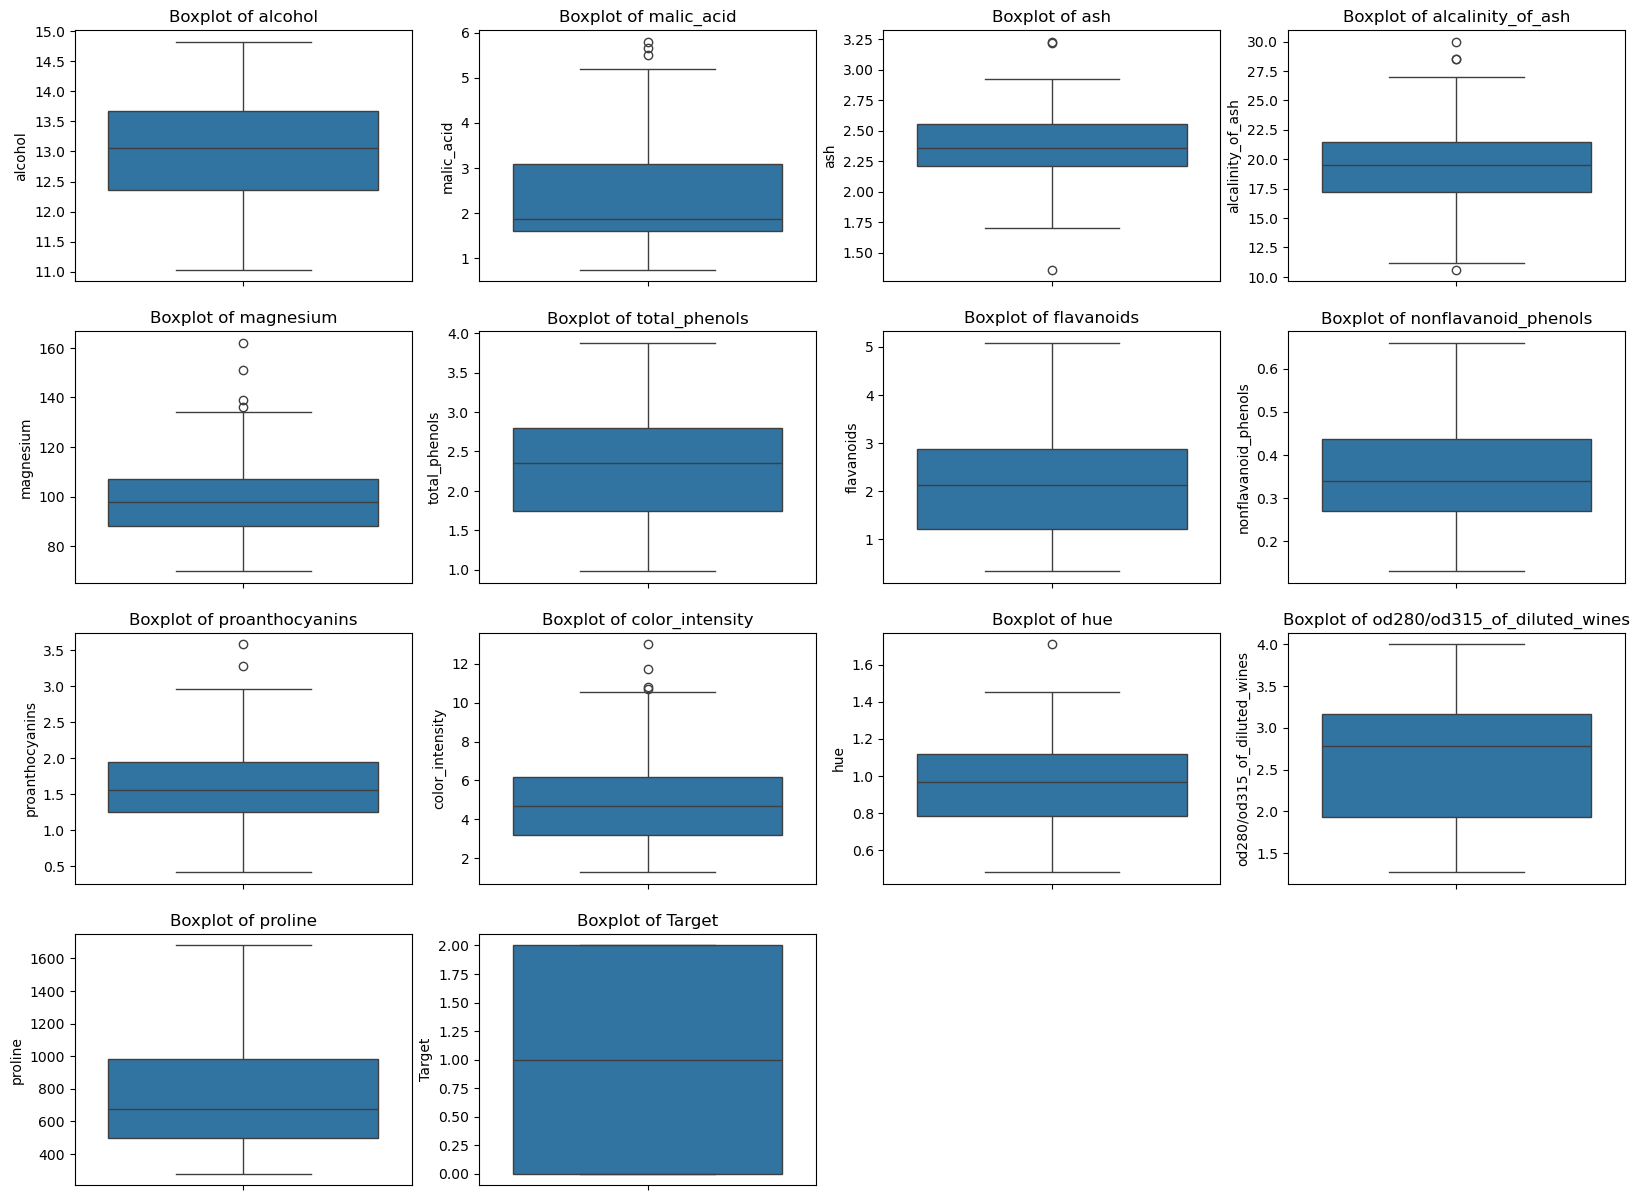

In [12]:
for i, col in enumerate(df):
    plt.subplot(4, 4, i+1)
    plt.title(f"Boxplot of {col}")
    sns.boxplot(df[col])

- According the box plot, there are some outliers in some column but not too large, but most of outliers in `color_intensity`
- we will check specific with IQR

In [13]:
df_clean = df.copy()

<div style="background-color:white; font-size:15px; color:red; border-radius:15px; padding:23px; font-family:'Poppins';" >Interquartile Analysis (IQR)</div>

In [14]:
def IQR_Analysis(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

outliers_indicies = []
for col in df:
    outliers = IQR_Analysis(df, col)
    indicies = outliers.index.tolist()
    outliers_indicies.append(indicies)
    print(col)
    print(f"Total Outliers: {len(outliers)}")
    df_clean.loc[indicies, col] = df[col].median()
    outliers = IQR_Analysis(df_clean, col)
    print(f"After Handling: {len(outliers)}")
    print("============")

alcohol
Total Outliers: 0
After Handling: 0
malic_acid
Total Outliers: 3
After Handling: 1
ash
Total Outliers: 3
After Handling: 3
alcalinity_of_ash
Total Outliers: 4
After Handling: 0
magnesium
Total Outliers: 4
After Handling: 1
total_phenols
Total Outliers: 0
After Handling: 0
flavanoids
Total Outliers: 0
After Handling: 0
nonflavanoid_phenols
Total Outliers: 0
After Handling: 0
proanthocyanins
Total Outliers: 2
After Handling: 0
color_intensity
Total Outliers: 4
After Handling: 3
hue
Total Outliers: 1
After Handling: 0
od280/od315_of_diluted_wines
Total Outliers: 0
After Handling: 0
proline
Total Outliers: 0
After Handling: 0
Target
Total Outliers: 0
After Handling: 0


#### **Z-Score Analysis**

In [15]:
def z_score(df, col):
    mean = df[col].mean()
    std = df[col].std()
    z_scores = (df[col] - mean) / std
    outliers = df[(z_scores < -3) | (z_scores > 3)]
    return outliers

for col in df:
    outliers_z_score = z_score(df, col)
    print(col)
    print(f'Total Outliers {len(outliers_z_score)}')
    print("===================")

alcohol
Total Outliers 0
malic_acid
Total Outliers 1
ash
Total Outliers 3
alcalinity_of_ash
Total Outliers 1
magnesium
Total Outliers 2
total_phenols
Total Outliers 0
flavanoids
Total Outliers 1
nonflavanoid_phenols
Total Outliers 0
proanthocyanins
Total Outliers 1
color_intensity
Total Outliers 1
hue
Total Outliers 1
od280/od315_of_diluted_wines
Total Outliers 0
proline
Total Outliers 0
Target
Total Outliers 0


- the outliers in some column is only a small number, its because the dataset is only have small row,
- maximum sum of outliers per column is only 4

Text(0.5, 0.98, 'Target ')

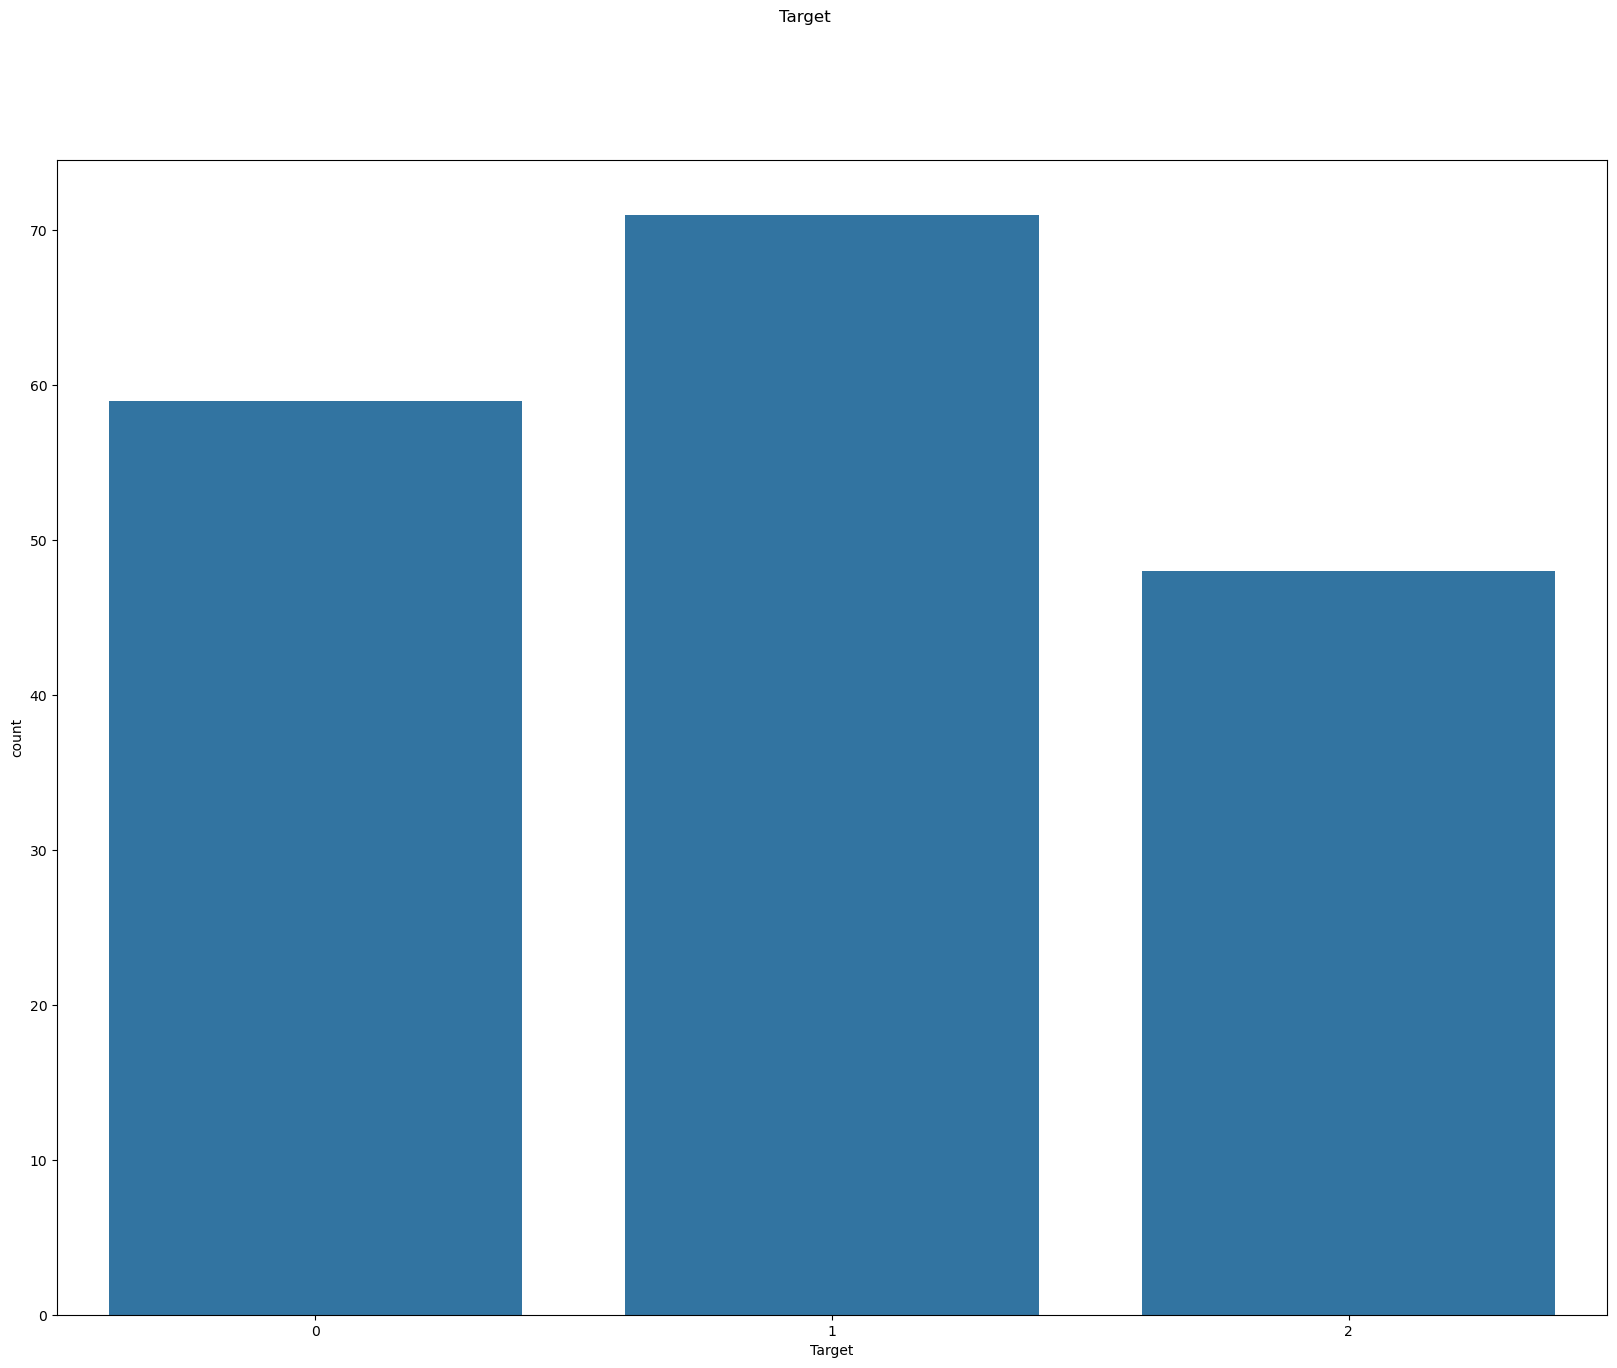

In [16]:
sns.countplot(x = df['Target'], )
plt.suptitle("Target ")

**Inteprete of plot 📊**
- Most of data entry have 1 quality of wine
- next to 0 quality and 2 quality

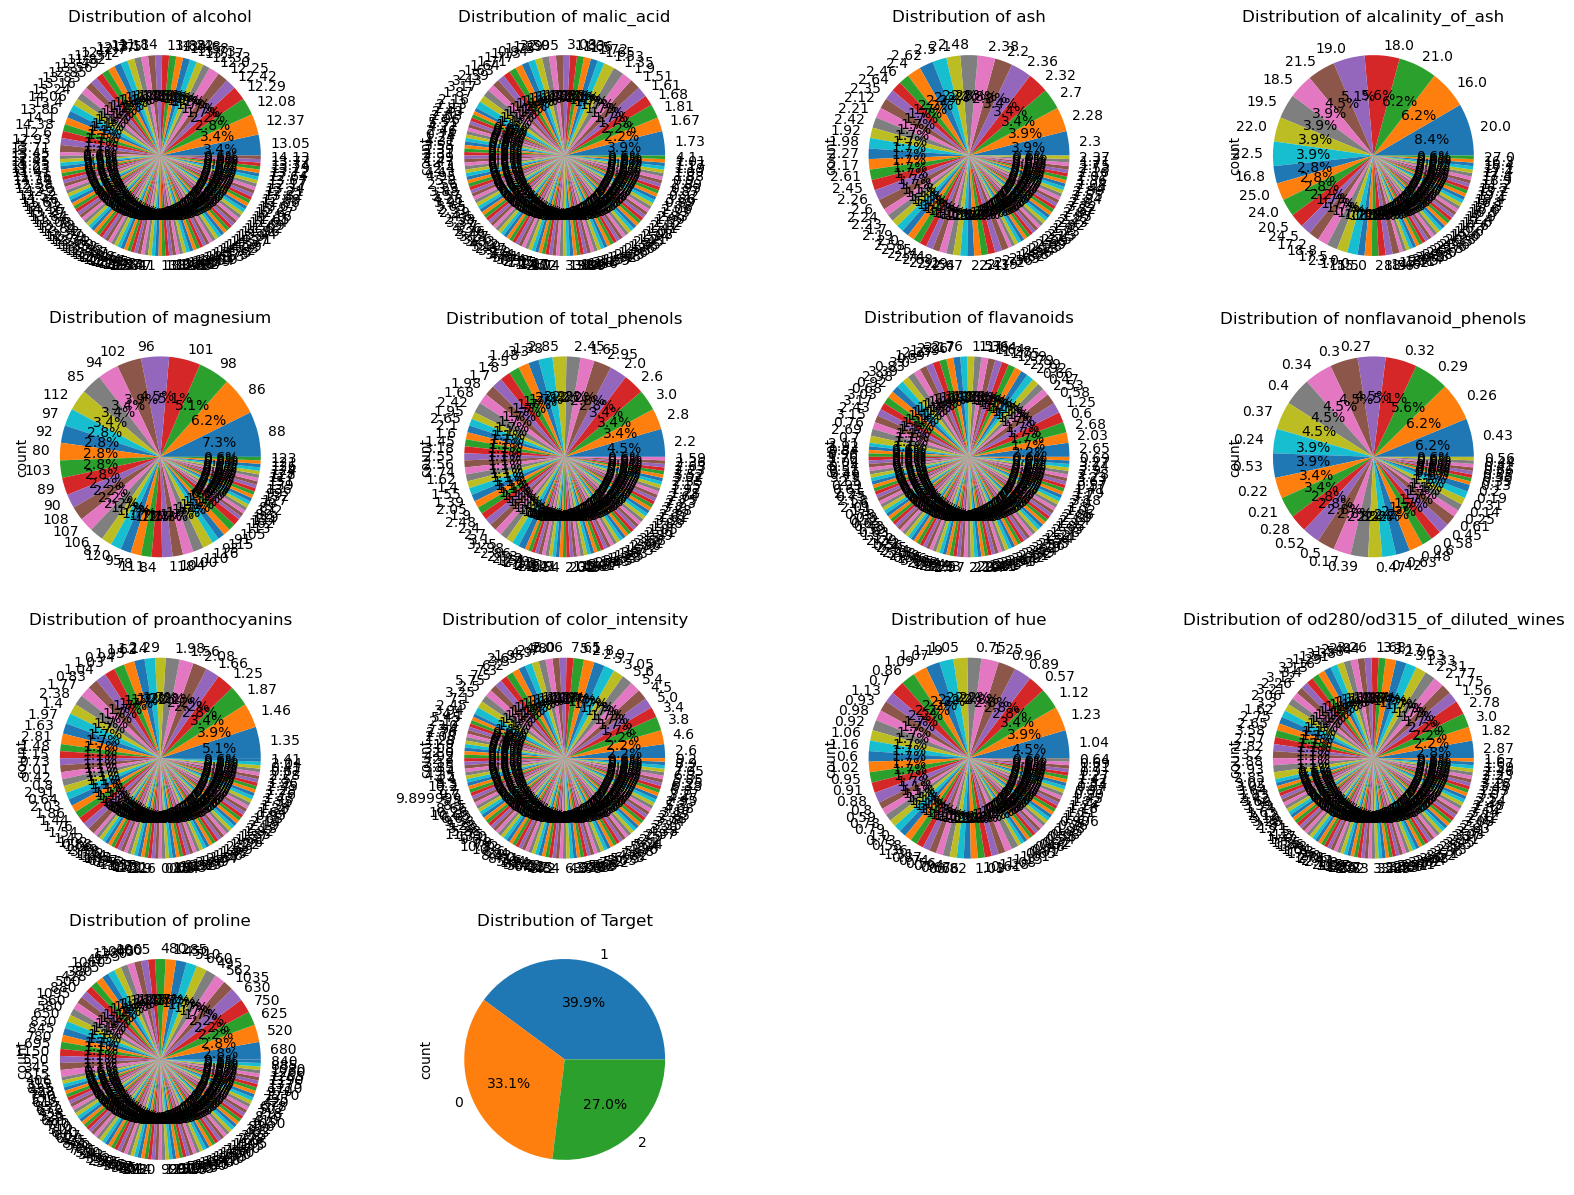

In [17]:
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    plt.title(f'Distribution of {col}')
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: >

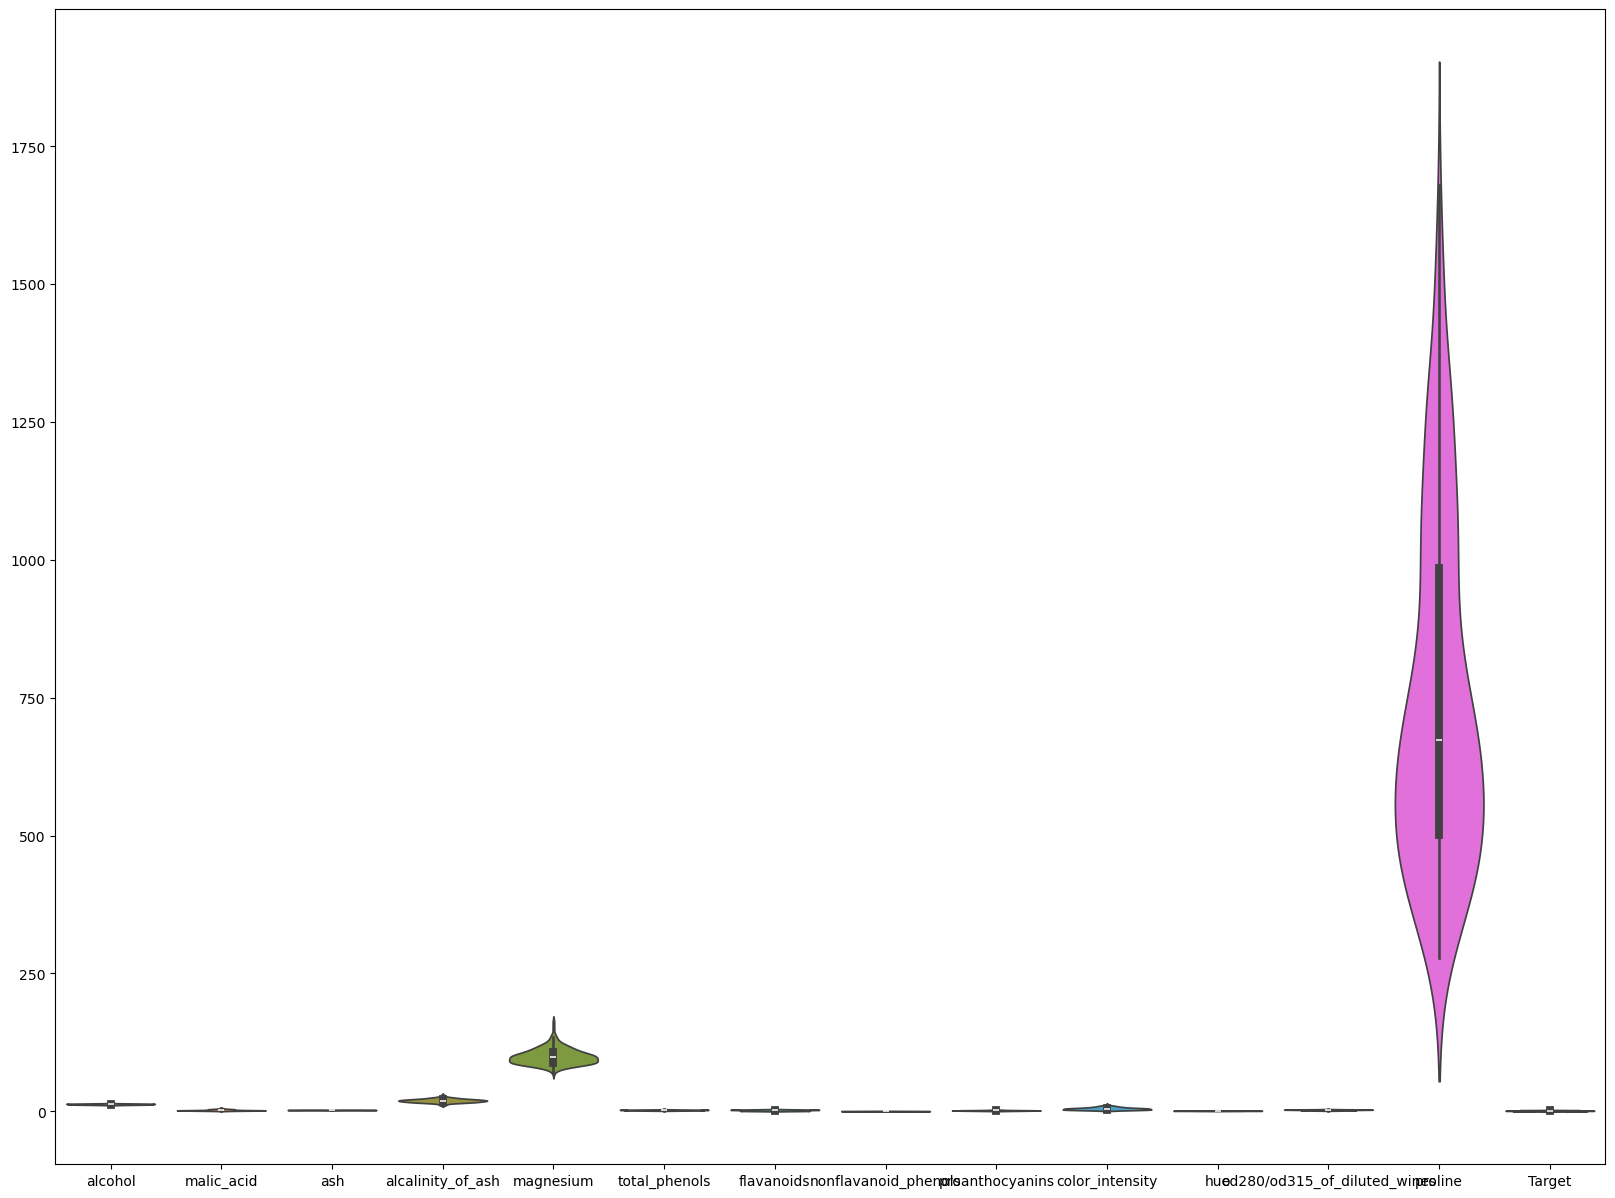

In [18]:
sns.violinplot(data=df)

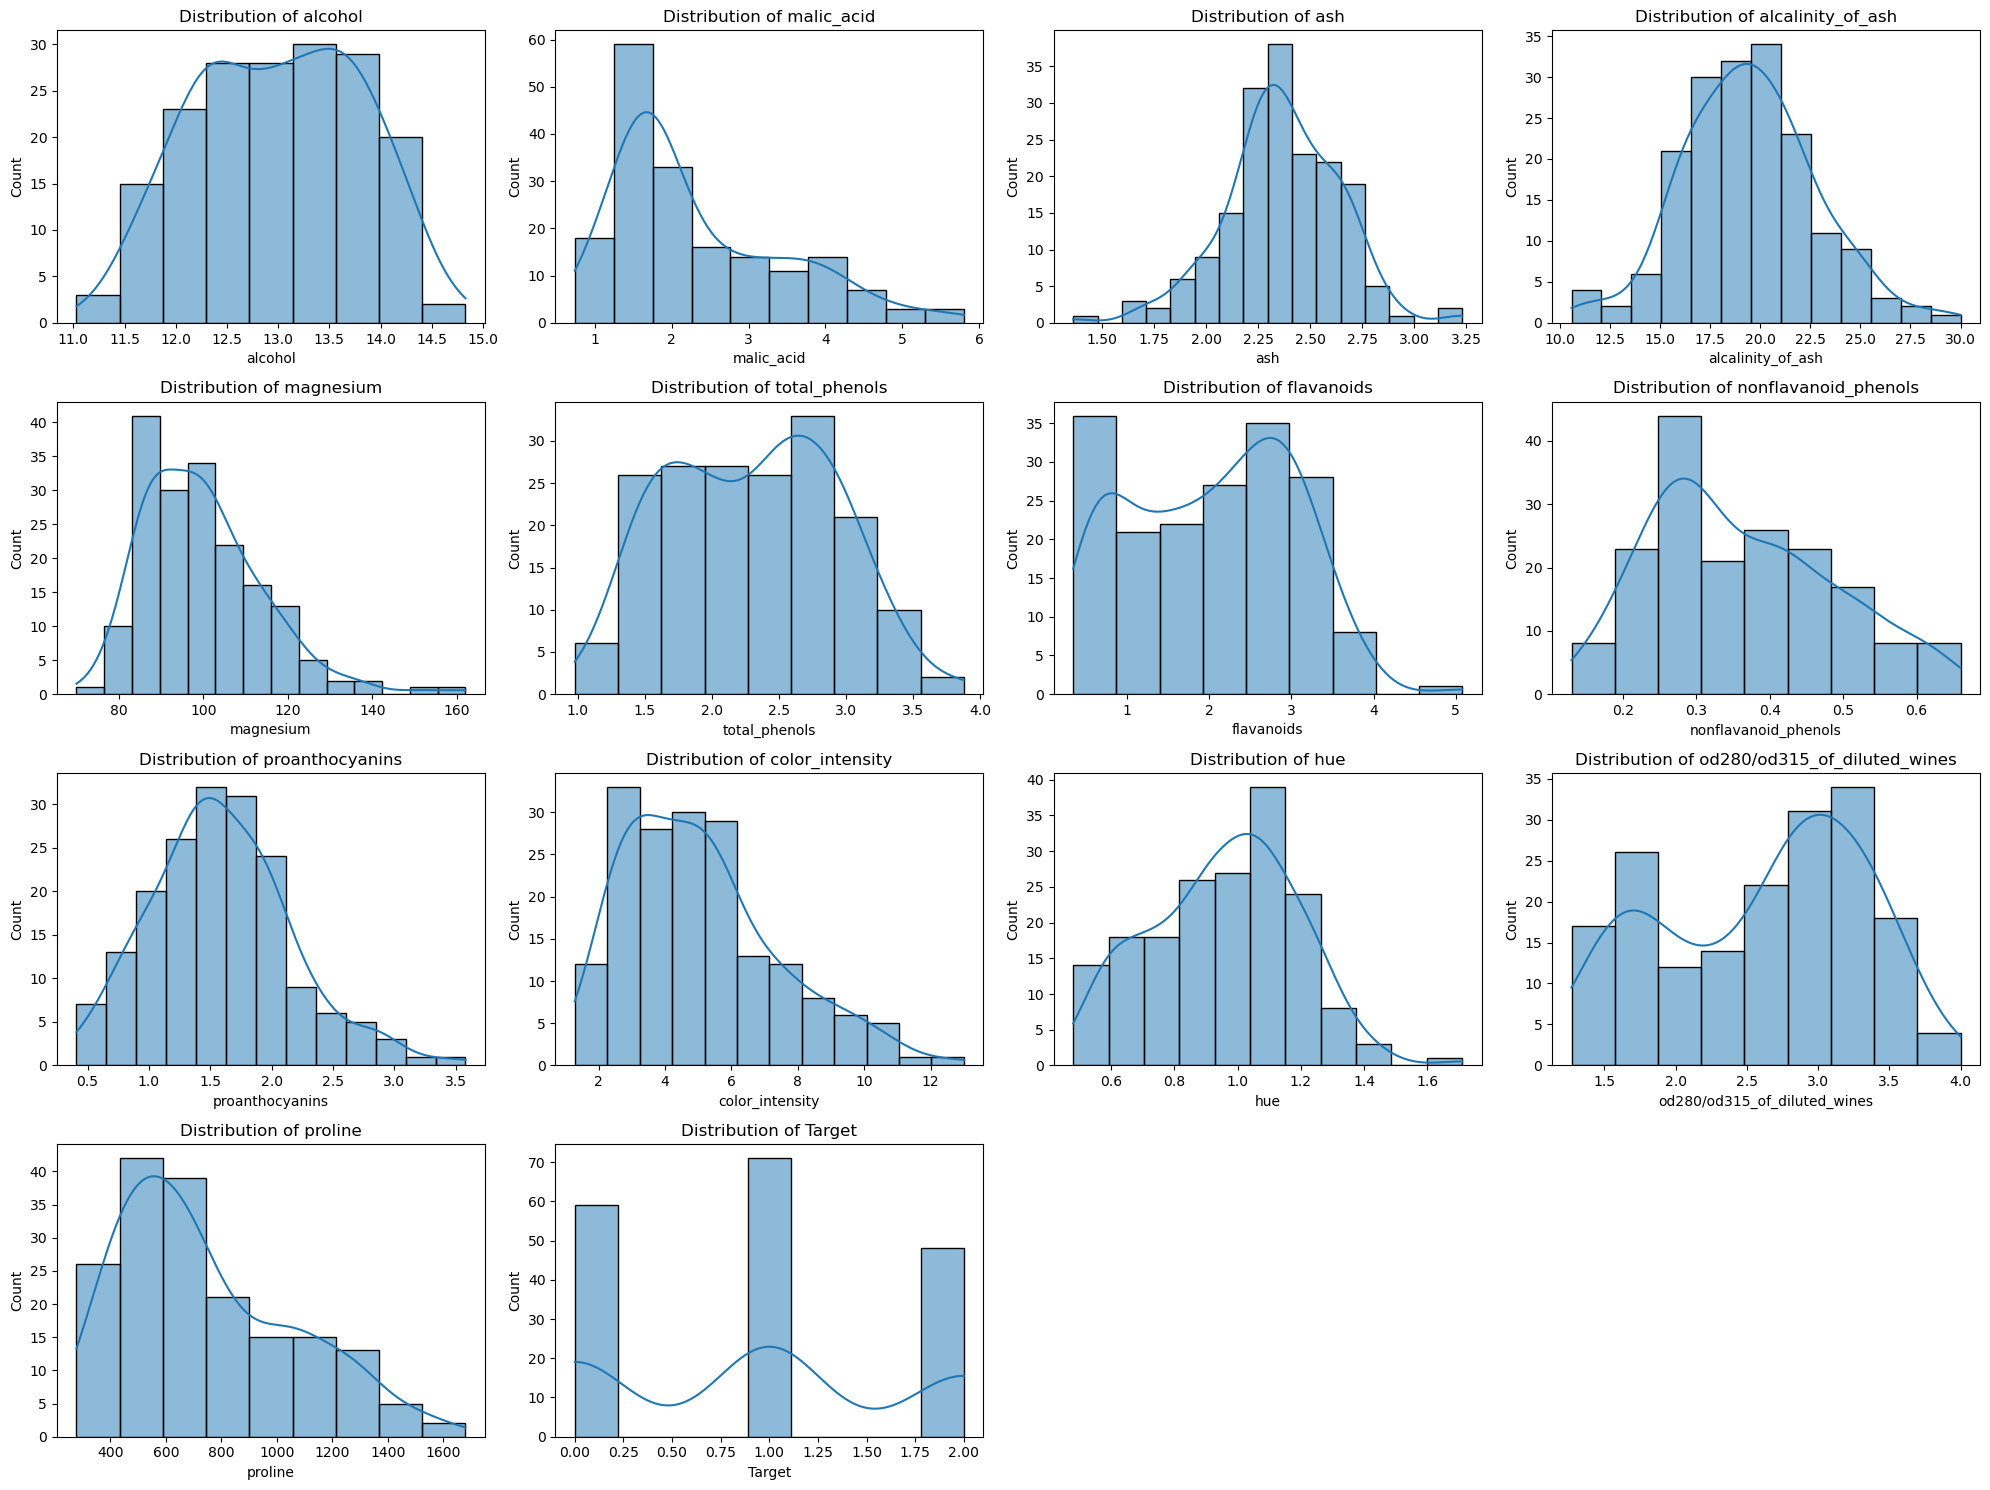

In [19]:
plt.rcParams['figure.figsize'] = (20, 15)
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    plt.title(f'Distribution of {col}')
    sns.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

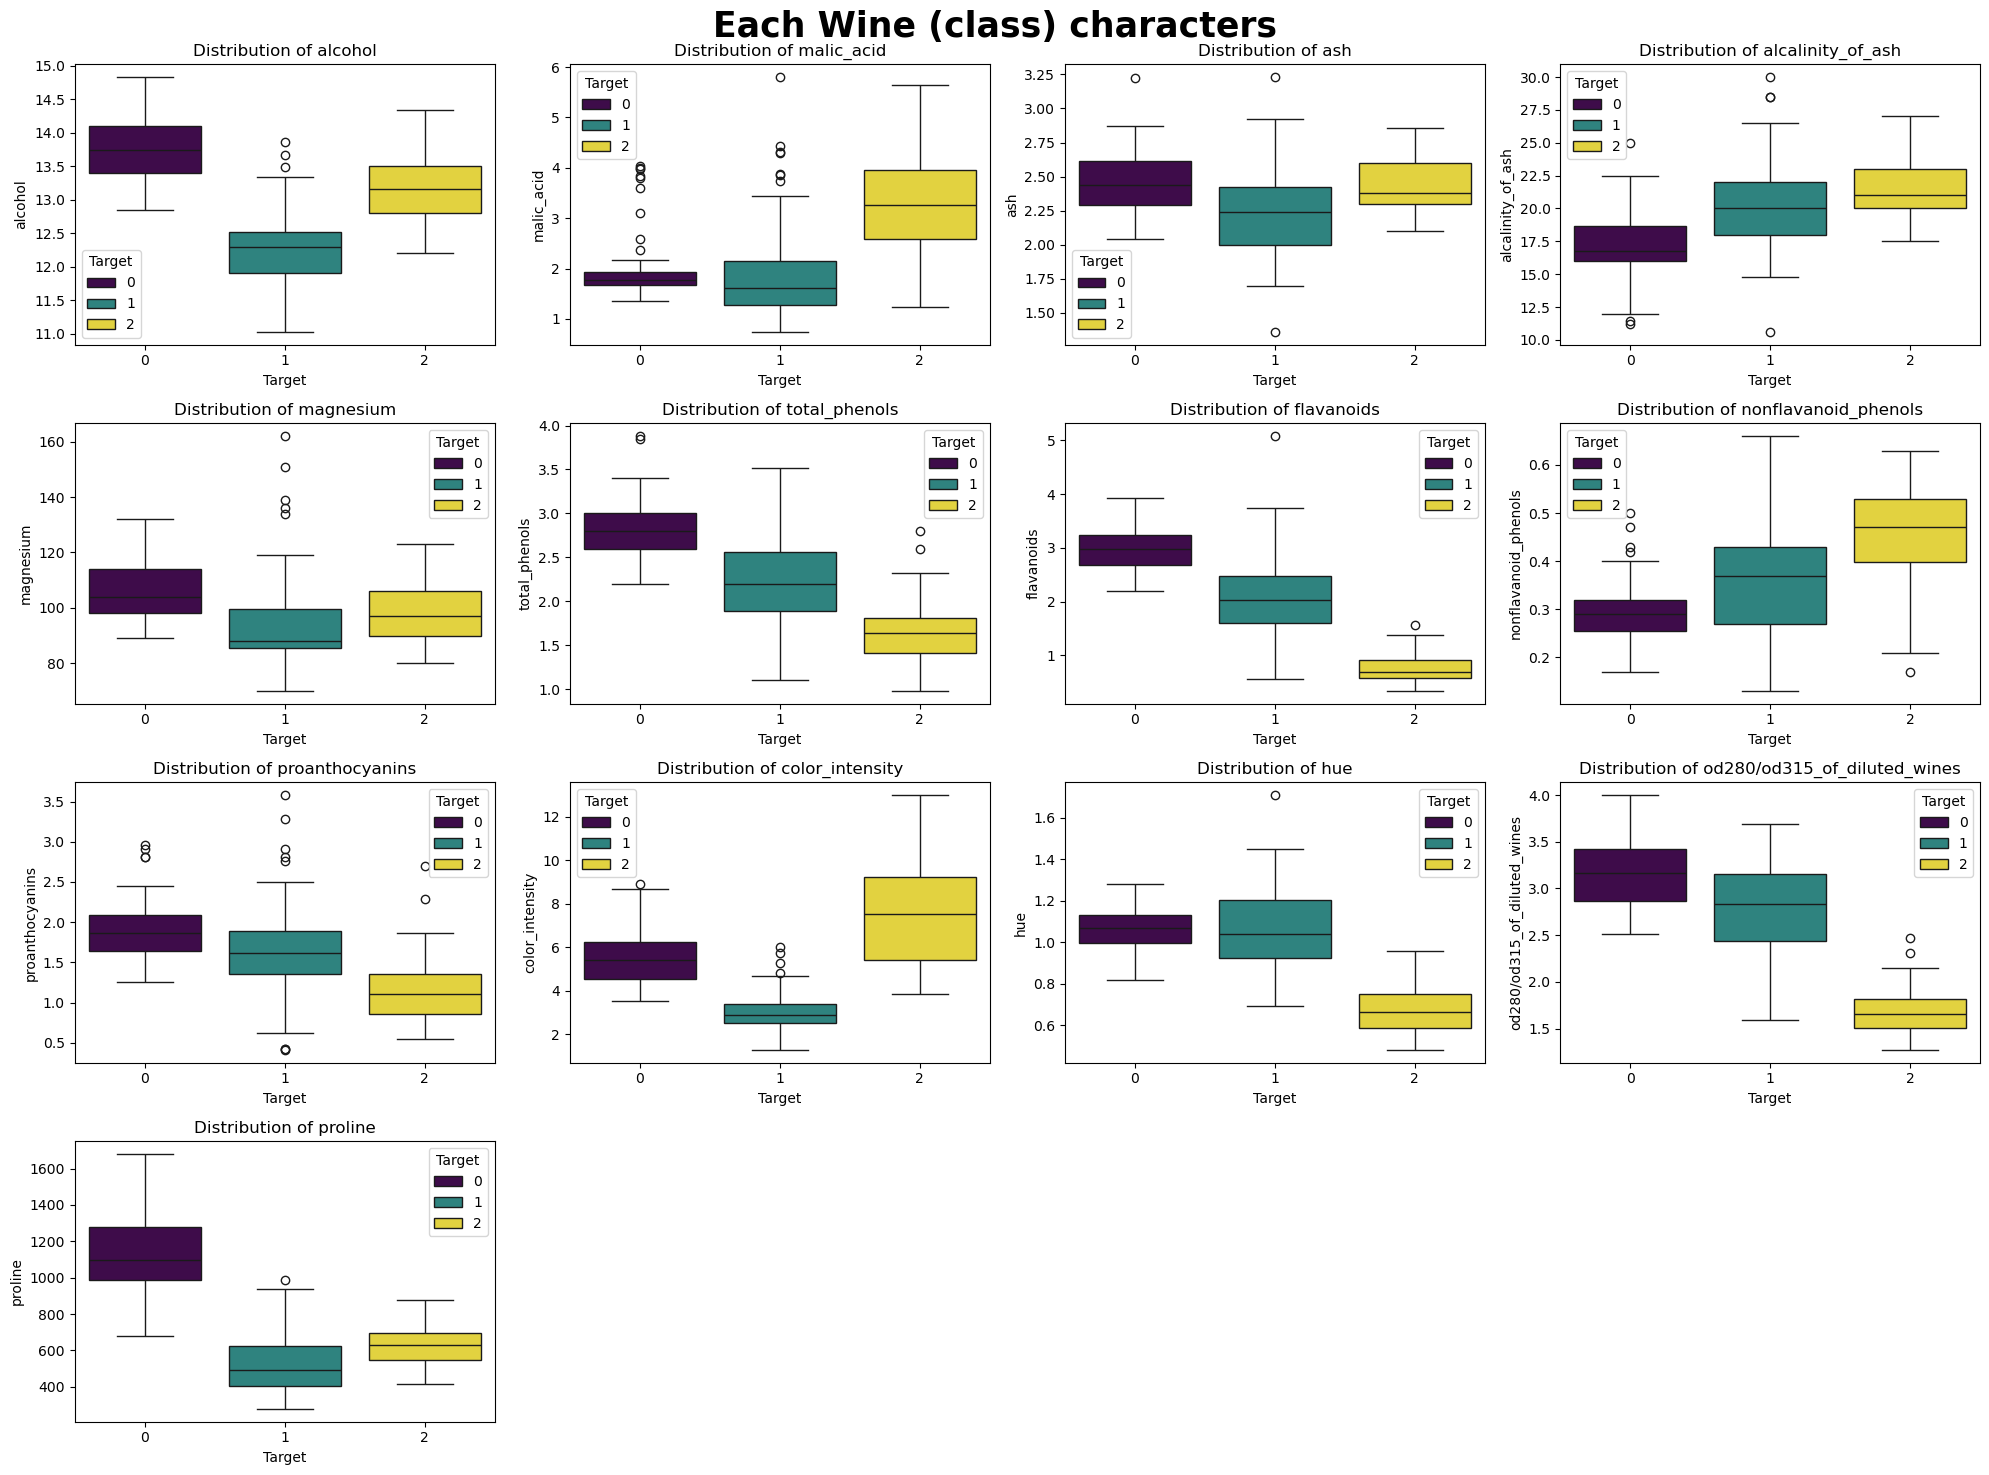

In [20]:
for i, col in enumerate(df.drop('Target', axis=1).columns):
    plt.subplot(4, 4, i+1)
    plt.title(f'Distribution of {col}')
    sns.boxplot(data=df, x='Target', y=col, hue='Target', palette='viridis')
plt.suptitle(f'Each Wine (class) characters', size=25, weight='bold')
plt.tight_layout()
plt.show()

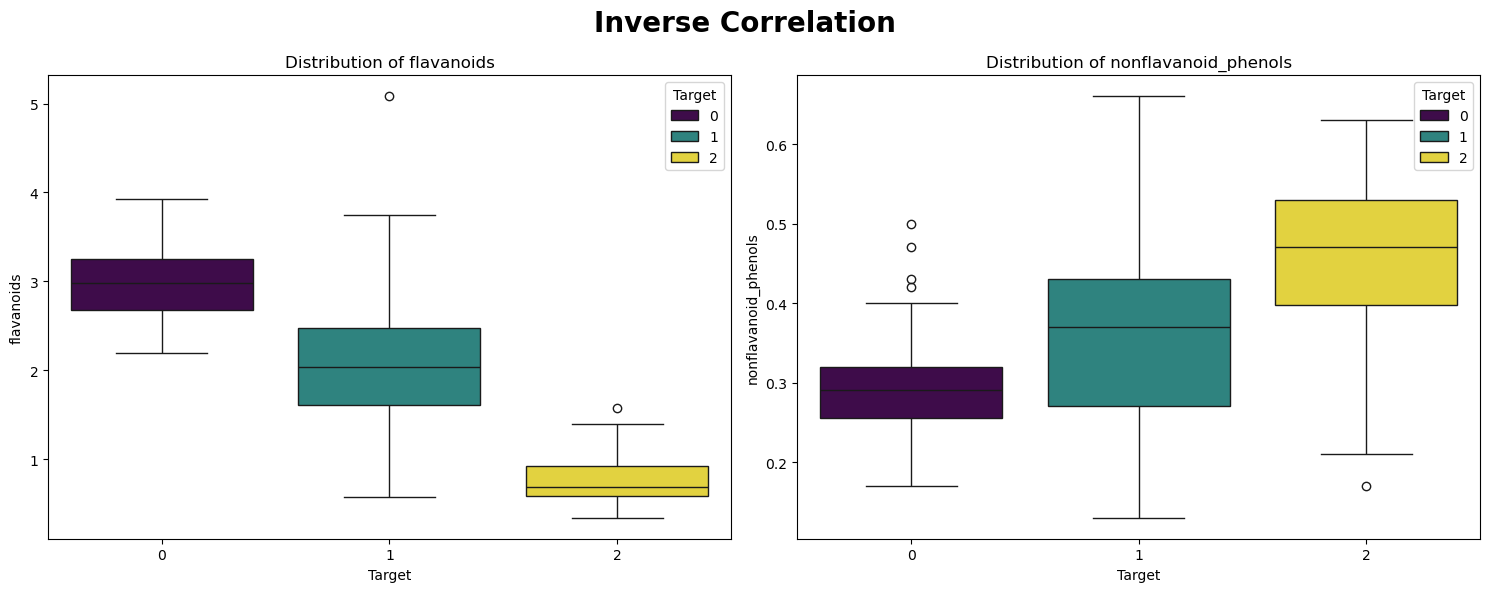

In [21]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title(f'Distribution of flavanoids')
sns.boxplot(data=df, x='Target', y='flavanoids', hue='Target', palette='viridis')

plt.subplot(1, 2, 2)
plt.title(f'Distribution of nonflavanoid_phenols')
sns.boxplot(data=df, x='Target', y='nonflavanoid_phenols', hue='Target', palette='viridis')

plt.suptitle('Inverse Correlation', size=20, weight='bold')
plt.tight_layout()
plt.show()

- `flavanoids` tell the color and taste, `nonflavanoid` is more of the stability.
- meaning it the flavor is `decreseing` the wine is `more stable` (in case of the contents)

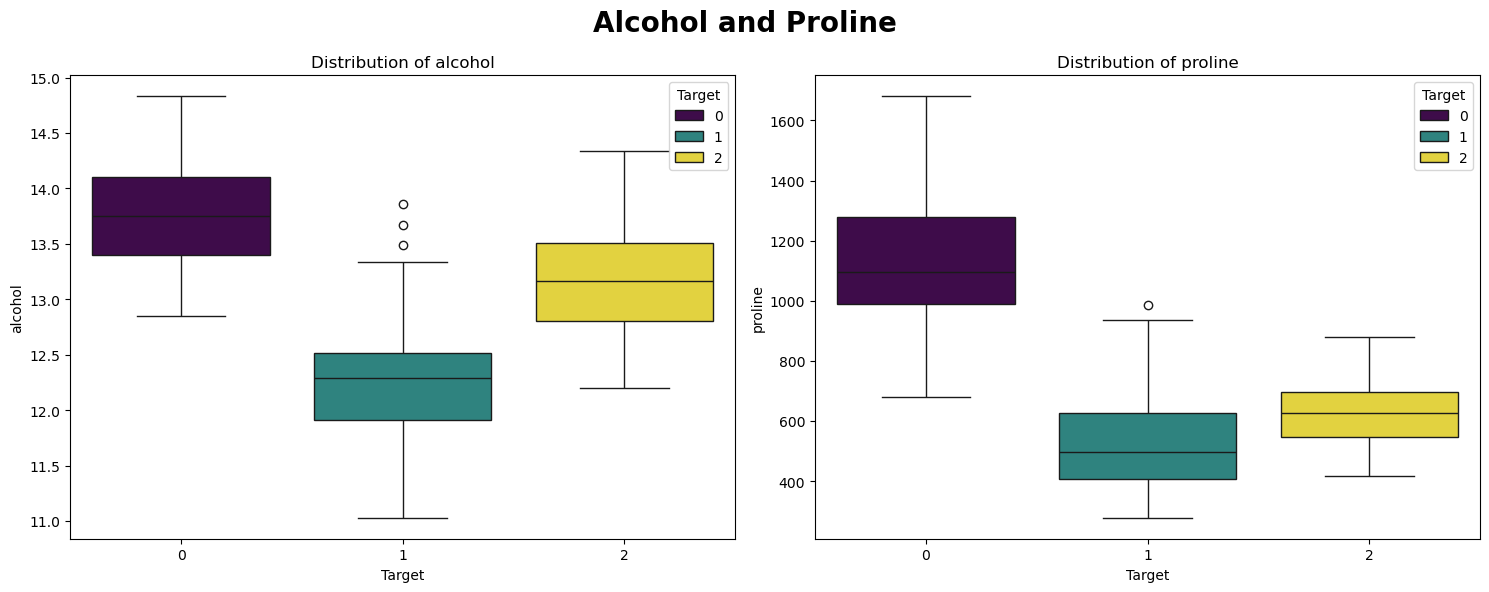

In [22]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title(f'Distribution of alcohol')
sns.boxplot(data=df, x='Target', y='alcohol', hue='Target', palette='viridis')

plt.subplot(1, 2, 2)
plt.title(f'Distribution of proline')
sns.boxplot(data=df, x='Target', y='proline', hue='Target', palette='viridis')

plt.suptitle('Alcohol and Proline', size=20, weight='bold')
plt.tight_layout()
plt.show()

- `wine 0` has the highest **alcohol** as well as **aroma (proline)**
- there's a slight tendency where the alcohol is high the proline is also high

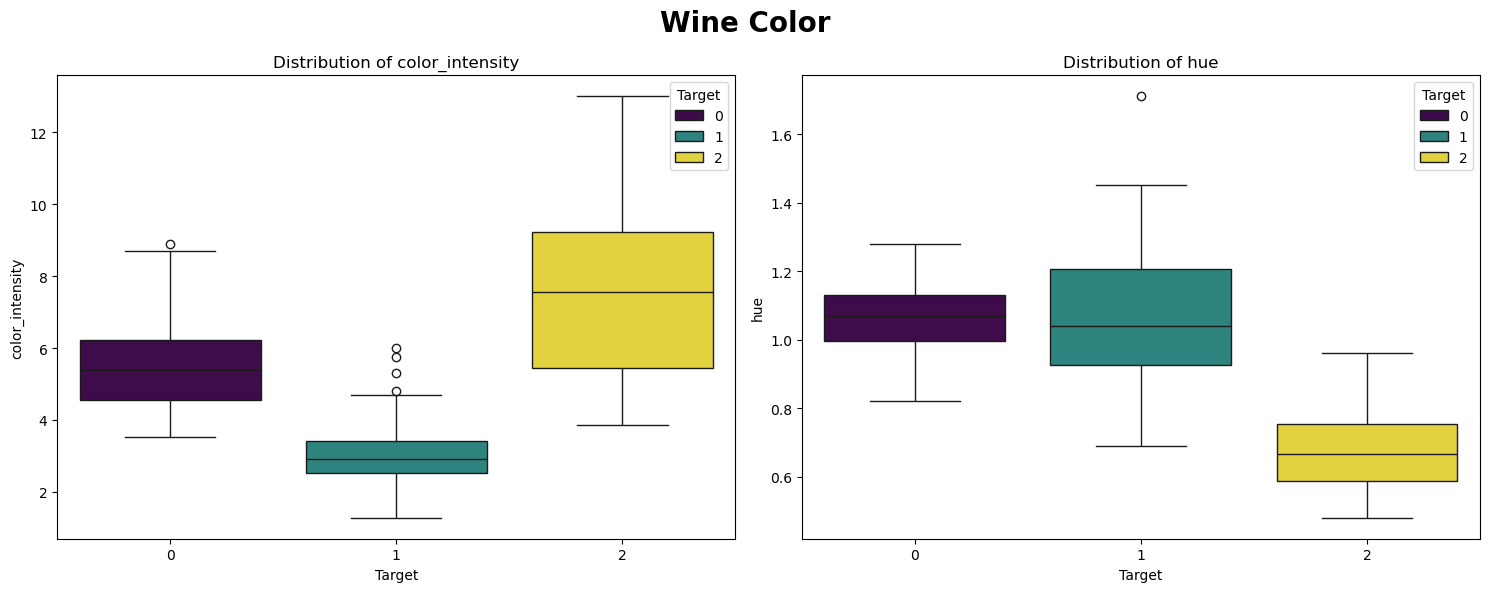

In [23]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title(f'Distribution of color_intensity')
sns.boxplot(data=df, x='Target', y='color_intensity', hue='Target', palette='viridis')

plt.subplot(1, 2, 2)
plt.title(f'Distribution of hue')
sns.boxplot(data=df, x='Target', y='hue', hue='Target', palette='viridis')

plt.suptitle('Wine Color', size=20, weight='bold')
plt.tight_layout()
plt.show()

- `wine 2` has the highest range of `color intensity`, meaning this type of wine is `richer`
- hue tells age and varietal characteristics, in case of **ash** and **alkalinity_ash** `wine 2` is the highest
- there is a chance `lower` hue means more **chars** and **age**

In [24]:
df['alcohol / magnesium'] = df['alcohol'] / df['magnesium']
df['malic_acid / flavanoids'] = df['malic_acid'] / df['flavanoids']

In [25]:
df.groupby('Target')['alcohol / magnesium'].mean()

Target
0    0.130398
1    0.133073
2    0.134010
Name: alcohol / magnesium, dtype: float64

In [26]:
df.groupby('Target')['malic_acid / flavanoids'].mean()

Target
0    0.691289
1    1.011337
2    4.947384
Name: malic_acid / flavanoids, dtype: float64

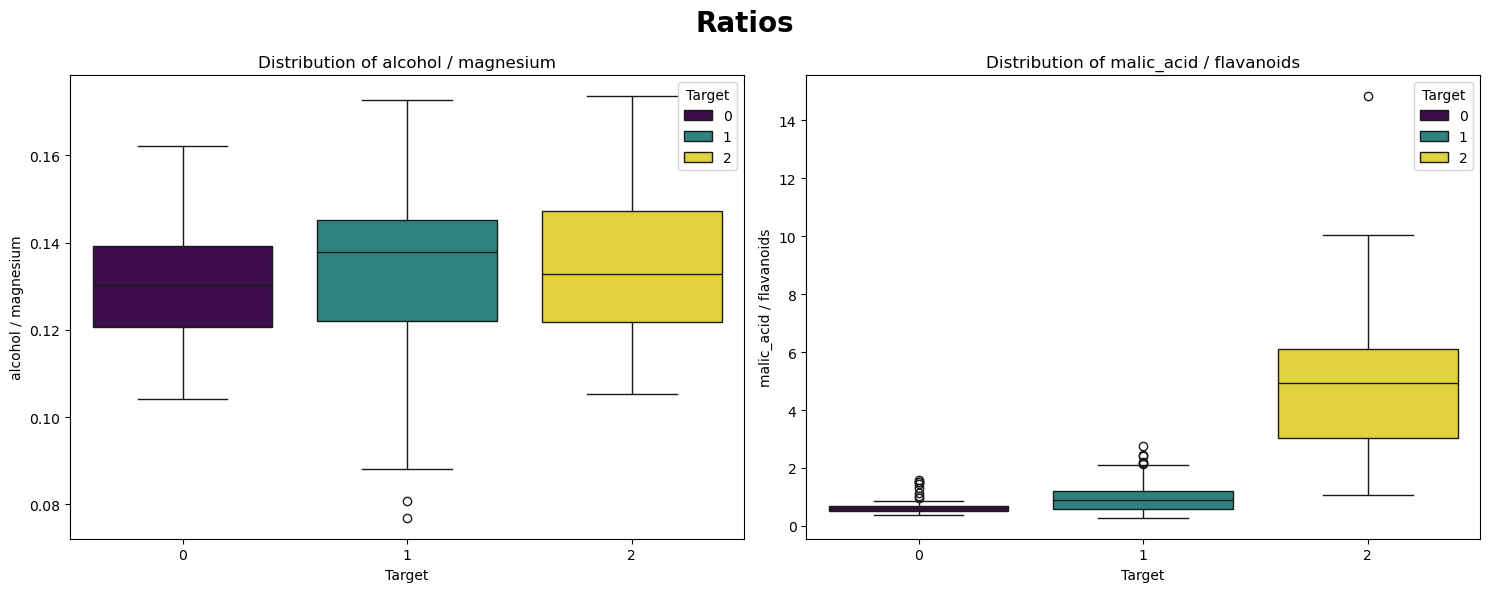

In [27]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title(f'Distribution of alcohol / magnesium')
sns.boxplot(data=df, x='Target', y='alcohol / magnesium', hue='Target', palette='viridis')

plt.subplot(1, 2, 2)
plt.title(f'Distribution of malic_acid / flavanoids')
sns.boxplot(data=df, x='Target', y='malic_acid / flavanoids', hue='Target', palette='viridis')

plt.suptitle('Ratios', size=20, weight='bold')
plt.tight_layout()
plt.show()

- in case of the `alcohol intensity` and `magnesium` (**yeast healthiness**) good ratio, `wine 2 wins`
- `wine 0` has consistent ratio of `malic_acid` and `flavanoids` (almost reaching 1:1)
-` wine 2` is diverse in tem of the ratio, it is `higher` in term of the **malic_acid** and lower in term of **flavanoids**

In [28]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Target',
       'alcohol / magnesium', 'malic_acid / flavanoids'],
      dtype='object')

In [29]:
total = np.sum(df[['flavanoids', 'nonflavanoid_phenols', 'proanthocyanins']], axis=1)
total

0      5.63
1      4.30
2      6.35
3      5.91
4      4.90
       ... 
173    2.19
174    2.59
175    2.47
176    2.67
177    2.67
Length: 178, dtype: float64

In [30]:
ratio = df[['flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'Target']]

In [31]:
ratio.iloc[:, :-1] = ratio.iloc[:, :-1].divide(total, axis=0)

In [32]:
ratio

,flavanoids,nonflavanoid_phenols,proanthocyanins,Target
0,0.543517,0.049734,0.406750,0
1,0.641860,0.060465,0.297674,0
2,0.510236,0.047244,0.442520,0
3,0.590525,0.040609,0.368866,0
4,0.548980,0.079592,0.371429,0
...,...,...,...,...
173,0.278539,0.237443,0.484018,2
174,0.289575,0.166023,0.544402,2
175,0.279352,0.174089,0.546559,2
176,0.254682,0.198502,0.546816,2


In [33]:
ratio.groupby('Target').mean()

,flavanoids,nonflavanoid_phenols,proanthocyanins
Target,,,
0,0.578127,0.057185,0.364687
1,0.507179,0.098656,0.394165
2,0.326438,0.198034,0.475528


- the ratio tells us that `wine 0` has the **lowest** avg of nonflavanoid, meaning it is **more not stable**
- `wine 2` tells us it has the **most evenly distributed phenols** out of all

<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" >Multivariate Analysis</div>

<Axes: title={'center': 'correlation heatmap analysis'}>

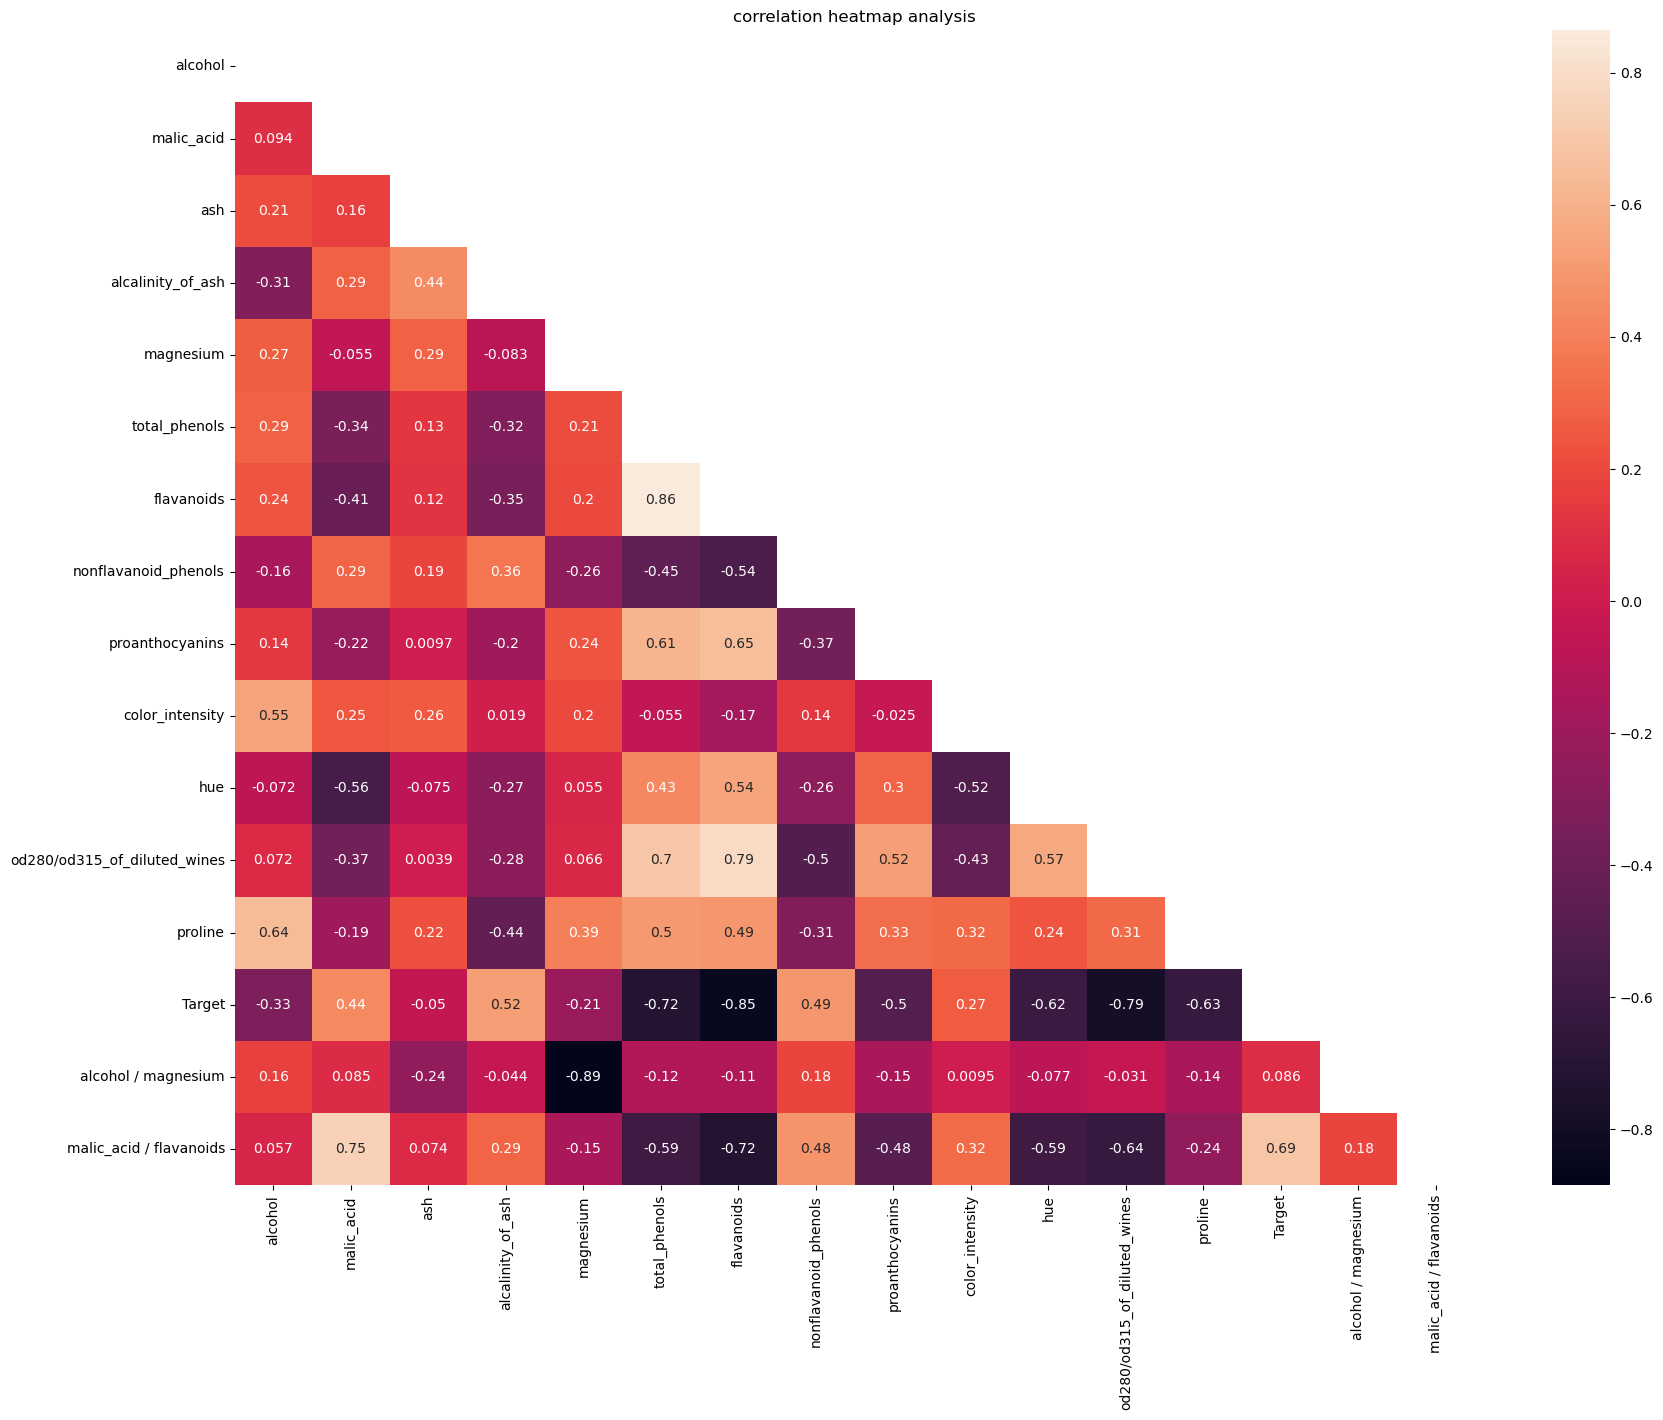

In [34]:
corr = df.corr()
plt.title("correlation heatmap analysis")
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), annot=True)

<div style="background-color:white; font-size:15px; color:red; border-radius:15px; padding:23px; font-family:'Poppins';" >Inteprete from Heatmap 📊</div>

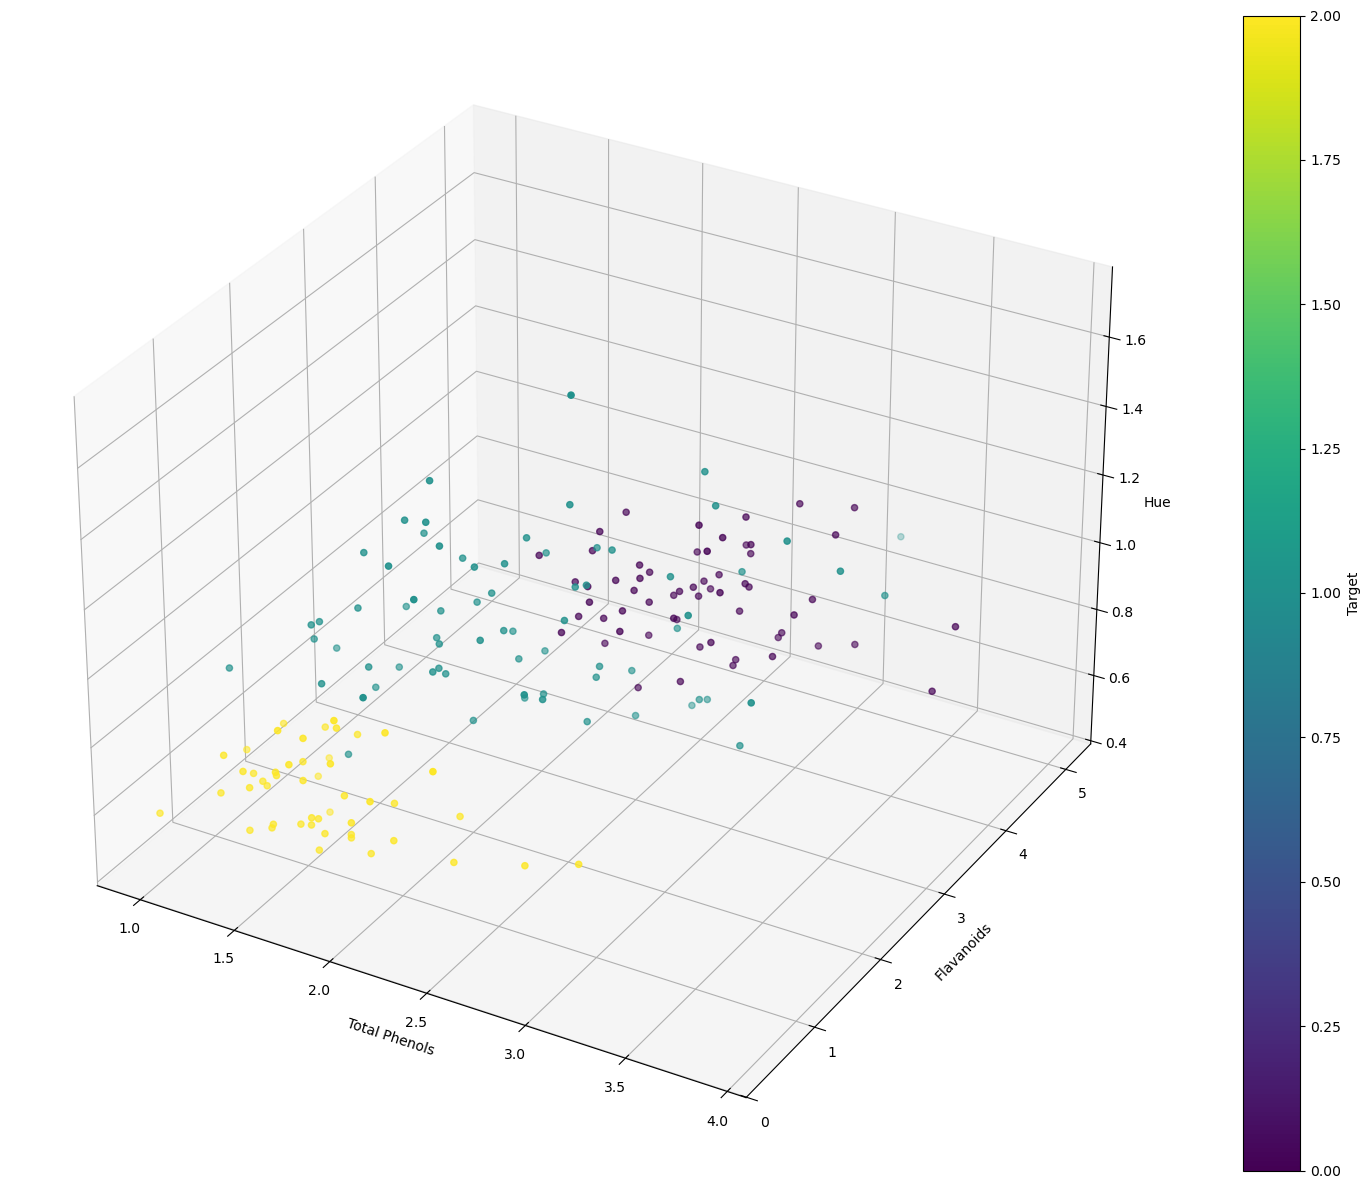

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['total_phenols'], df['flavanoids'], df['hue'], c=df['Target'], cmap='viridis')

ax.set_xlabel('Total Phenols')
ax.set_ylabel('Flavanoids')
ax.set_zlabel('Hue')
plt.colorbar(scatter, ax=ax, label='Target')
plt.show()

In [36]:
import numpy as np
import pandas as pd

def anova(groups):
    """
    Perform one-way ANOVA from scratch using Pandas and NumPy.
    
    Parameters:
        groups (list of arrays): List of groups, where each group is a numpy array of observations.
        
    Returns:
        dict: A dictionary containing SST, SSB, SSW, df_B, df_W, MSB, MSW, F-statistic, and p-value.
    """
    # Step 1: Flatten all groups into one dataset
    all_data = np.concatenate(groups)
    N = len(all_data)  # Total number of observations
    overall_mean = np.mean(all_data)  # Overall mean
    
    # Step 2: Calculate Total Sum of Squares (SST)
    SST = np.sum((all_data - overall_mean) ** 2)
    
    # Step 3: Calculate Between-Group Sum of Squares (SSB)
    SSB = 0
    for group in groups:
        group_mean = np.mean(group)
        group_size = len(group)
        SSB += group_size * (group_mean - overall_mean) ** 2
    
    # Step 4: Calculate Within-Group Sum of Squares (SSW)
    SSW = SST - SSB
    
    # Step 5: Degrees of Freedom
    k = len(groups)  # Number of groups
    df_B = k - 1  # Between-group degrees of freedom
    df_W = N - k  # Within-group degrees of freedom
    
    # Step 6: Mean Squares
    MSB = SSB / df_B  # Between-group mean square
    MSW = SSW / df_W  # Within-group mean square
    
    # Step 7: F-statistic
    F = MSB / MSW
    
    # Step 8: P-value
    # Compute the p-value using the survival function (1 - CDF) of the F-distribution
    p_value = 1 - np.array([np.sum(np.random.f(df_B, df_W, 100000) <= F) / 100000])[0]
    
    # Return results as a dictionary
    return {
        "SST": SST,
        "SSB": SSB,
        "SSW": SSW,
        "df_B": df_B,
        "df_W": df_W,
        "MSB": MSB,
        "MSW": MSW,
        "F-statistic": F,
        "p-value": p_value
    }

# Example Usage
group1 = np.array([14.23, 13.2, 13.16, 14.37, 13.24])
group2 = np.array([12.37, 12.33, 12.64, 13.67, 12.37])
group3 = np.array([12.86, 12.88, 12.81, 1])

anova([group1, group2, group3])

{'SST': 140.96452142857143,
 'SSB': 32.88372642857142,
 'SSW': 108.08079500000001,
 'df_B': 2,
 'df_W': 11,
 'MSB': 16.44186321428571,
 'MSW': 9.82552681818182,
 'F-statistic': 1.6733823558305876,
 'p-value': 0.23197}

In [37]:
import pandas as pd
import numpy as np

def anova(data):
    # Drop groups with all NaN values
    data = data.dropna(axis=1, how='all')
    
    # Check if there are at least two groups
    k = data.shape[1]
    if k < 2:
        raise ValueError("ANOVA requires at least two groups.")
    
    # Calculate grand mean
    grand_mean = data.values.flatten()
    grand_mean = grand_mean[~np.isnan(grand_mean)].mean()
    
    # Group means and counts
    group_means = data.mean(axis=0)
    n_i = data.count(axis=0)
    N = n_i.sum()
    
    # Sum of Squares Between (SSB)
    ssb = (n_i * (group_means - grand_mean)**2).sum()
    
    # Sum of Squares Within (SSW)
    ssw = ((data - group_means)**2).sum().sum()
    
    # Degrees of freedom
    df_between = k - 1
    df_within = N - k
    
    if df_within <= 0:
        raise ValueError("Degrees of freedom within groups must be positive.")
    
    # Mean Squares
    msb = ssb / df_between
    msw = ssw / df_within
    
    # Calculate F-statistic and p-value
    if msw == 0:
        if msb == 0:
            # All groups have no variance and same mean
            f_stat = np.nan
            p_value = 1.0
        else:
            # MSW is zero but MSB is non-zero (infinite F)
            f_stat = np.inf
            x = 1.0
            a = df_between / 2
            b = df_within / 2
            cdf = np.betainc(a, b, x)
            p_value = 1 - cdf
    else:
        f_stat = msb / msw
        x = (df_between * f_stat) / (df_between * f_stat + df_within)
        a = df_between / 2
        b = df_within / 2
        cdf = np.betainc(a, b, x)
        p_value = 1 - cdf
    
    # Create ANOVA table
    anova_table = pd.DataFrame({
        'Source': ['Between Groups', 'Within Groups', 'Total'],
        'SS': [ssb, ssw, ssb + ssw],
        'df': [df_between, df_within, df_between + df_within],
        'MS': [msb, msw, np.nan],
        'F': [f_stat, np.nan, np.nan],
        'p-value': [p_value, np.nan, np.nan]
    })
    
    return anova_table

# Example usage:
# data = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'C': [7,8,9]})
# print(anova(data))

In [38]:
group1

array([14.23, 13.2 , 13.16, 14.37, 13.24])

<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" >Feature Selection</div>

<div style="background-color:white; font-size:15px; color:red; border-radius:15px; padding:23px; font-family:'Poppins';" >Variance Analysis</div>

In [39]:
df.var()

alcohol                             0.659062
malic_acid                          1.248015
ash                                 0.075265
alcalinity_of_ash                  11.152686
magnesium                         203.989335
total_phenols                       0.391690
flavanoids                          0.997719
nonflavanoid_phenols                0.015489
proanthocyanins                     0.327595
color_intensity                     5.374449
hue                                 0.052245
od280/od315_of_diluted_wines        0.504086
proline                         99166.717355
Target                              0.600679
alcohol / magnesium                 0.000277
malic_acid / flavanoids             5.336853
dtype: float64

`proline` and `magnesium` has the highest variance out of all, meaning there's a chance of disperate/differentiate the classes

<div style="background-color:white; font-size:15px; color:red; border-radius:15px; padding:23px; font-family:'Poppins';" >Mutual Information</div>

In [40]:
def compute_MI(table_contingency):
    observed = np.array(table_contingency.iloc[:-1, :-1])
    ratios = observed / np.sum(observed)
    Px = np.sum(ratios, axis=1, keepdims=True)
    Py = np.sum(ratios, axis=0, keepdims=True)
    nonzero = ratios > 0
    MI = np.sum( ratios[nonzero] * np.log( ratios[nonzero] / (Px @ Py)[nonzero] ) )
    return MI

In [41]:
bins = int(np.log(len(df) + 1))
print(f'Total groups for the numeric features: {bins}')

Total groups for the numeric features: 5


In [42]:
cols = []
MIs = []
for col in df.drop('Target', axis=1).columns:
    X = df[col]
    X = np.digitize(X, bins=np.linspace(X.min(), X.max(), bins))
    X_df = pd.DataFrame(X.T)
    crosstab = pd.crosstab(X_df[0], df['Target'])
    MI = compute_MI(crosstab)
    MIs.append(MI)
    cols.append(col)
    print(f'{col} MI: {MI}')

alcohol MI: 0.476503769800242
malic_acid MI: 0.006855474864048256
ash MI: 0.0773654397703771
alcalinity_of_ash MI: 0.11340823569615263
magnesium MI: 0.20435324598159949
total_phenols MI: 0.1684425968368935
flavanoids MI: 0.1982539475282251
nonflavanoid_phenols MI: 0.07618788944471505
proanthocyanins MI: 0.07612959350309711
color_intensity MI: 0.3117814540907777
hue MI: 0.03476701291623262
od280/od315_of_diluted_wines MI: 0.11523221964496025
proline MI: 0.49132949513303786
alcohol / magnesium MI: 0.05316611936858931
malic_acid / flavanoids MI: 0.0


In [43]:
indices = np.argsort(MIs)[::-1]
print(list(np.array(cols)[indices]))

['proline', 'alcohol', 'color_intensity', 'magnesium', 'flavanoids', 'total_phenols', 'od280/od315_of_diluted_wines', 'alcalinity_of_ash', 'ash', 'nonflavanoid_phenols', 'proanthocyanins', 'alcohol / magnesium', 'hue', 'malic_acid', 'malic_acid / flavanoids']


In [44]:
print(np.array(MIs)[indices])

[0.4913295  0.47650377 0.31178145 0.20435325 0.19825395 0.1684426
 0.11523222 0.11340824 0.07736544 0.07618789 0.07612959 0.05316612
 0.03476701 0.00685547 0.        ]


`proline` and `alcohol` has the highest MI score, meaning they **contribute the most** in predicting the **target**, although this value is `quite small` to be considered significant

In [45]:
def accuracy_calc(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test) * 100

def cross_validation(X, y, model, k=3):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    fold_size = n_samples // k
    accuracies = []
    
    for i in range(k):
        test_start = i * fold_size
        test_end = test_start + fold_size if i < k - 1 else n_samples 
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])
        
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_calc(y_pred, y_test)
        accuracies.append(accuracy)
        
    data = {
        'y_pred': y_pred, 'accuracies': accuracies,
        'X_train': X_train, 'X_test': X_test,
        'y_train': y_train, 'y_test': y_test,
    }
    
    return data 

In [46]:
def standardScalar(data):
    return (data - data.mean()) / data.std()

df_sclaed = df.copy()
for col in df.drop('Target', axis=1).columns:
    df_sclaed[col] = standardScalar(df_sclaed[col])


In [47]:
df_sclaed.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target,alcohol / magnesium,malic_acid / flavanoids
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0,-1.226261,-0.609410
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0,-0.026399,-0.572138
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0,-0.128807,-0.536007
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0,-0.316963,-0.609446
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0,-1.216872,-0.434530


<div style="background-color:red; font-size:30px; border-radius:10px; padding:23px; text-align:center; font-family:'Poppins'; color:white;" > 2 | Modelling </div>

<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" >Distances</div>

In [48]:
def euclidean(a, b):
    return np.sqrt(np.sum(a - b) ** 2)

def manhattan(a, b):
    return np.sum(np.abs(a - b))

def minkowski(a, b, p=1.5):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

In [49]:
from collections import Counter

In [50]:
class KNN:
    def __init__(self, k=3, distance=euclidean):
        self.k = k 
        self.distance = distance 
        
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.X_train = X_train 
        self.y_train = y_train 
        
    def predict(self, X: np.ndarray):
        predictions = [ max(self._predict(x)) for x in X ]
        return predictions
        
    def _predict(self, x):
        distances = [ self.distance(x, x_train) for x_train in self.X_train ]
        indices = np.argsort(distances)[:self.k]
        votes = [ self.y_train[i] for i in indices ]
        votes_count = Counter(votes)
        return votes_count

<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" >Let's try the model first</div>

In [51]:
df.head() 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target,alcohol / magnesium,malic_acid / flavanoids
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0.112047,0.558824
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0.132000,0.644928
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0.130297,0.728395
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0.127168,0.558739
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0.112203,0.962825


In [52]:
X = np.array(df[['flavanoids', 'od280/od315_of_diluted_wines']])
y = np.array(df['Target'])

In [53]:
knn = KNN()
knn.fit(X, y)
y_pred = knn.predict(X)

In [54]:
np.sum(y == y_pred) / len(y_pred) * 100

76.40449438202246

let's try new instance

In [55]:
knn._predict(np.array([3.03, 4.0]))

Counter({0: 3})

ok, seems fine, now let's try with several scenarios

<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" > Scenario 1:  flavanoids and od280/od315_of_diluted_wines</div>

this is still using the default parameters of K and distance

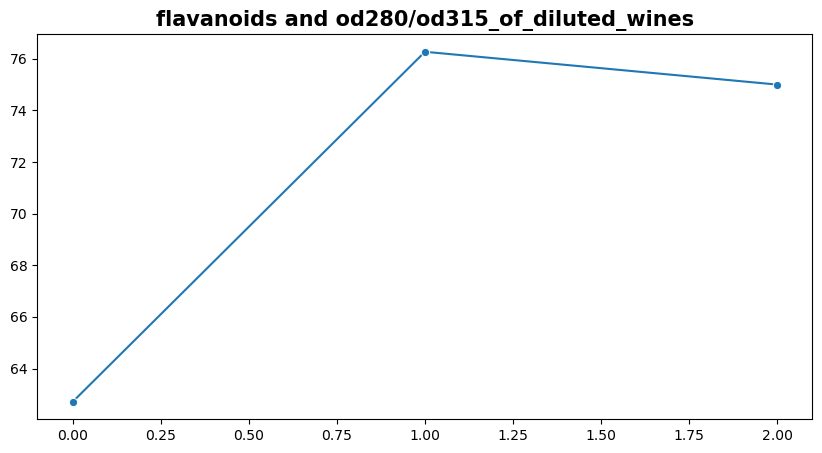

In [56]:
X = np.array(df[['flavanoids', 'od280/od315_of_diluted_wines']])
y = np.array(df['Target'])

model = KNN()
data = cross_validation(X, y, model, k=3)
plt.figure(figsize=(10, 5))
sns.lineplot(data['accuracies'], marker='o')
plt.title('flavanoids and od280/od315_of_diluted_wines', size=15, weight='bold')
plt.show()

In [57]:
train = len(data['X_train']) / len(df) * 100
test = len(data['X_test']) / len(df) * 100
print(f'Training set: {train}%')
print(f'Training set: {test}%')

Training set: 66.29213483146067%
Training set: 33.70786516853933%


the accuracy is around 69% - 75%

how about that is scaled?

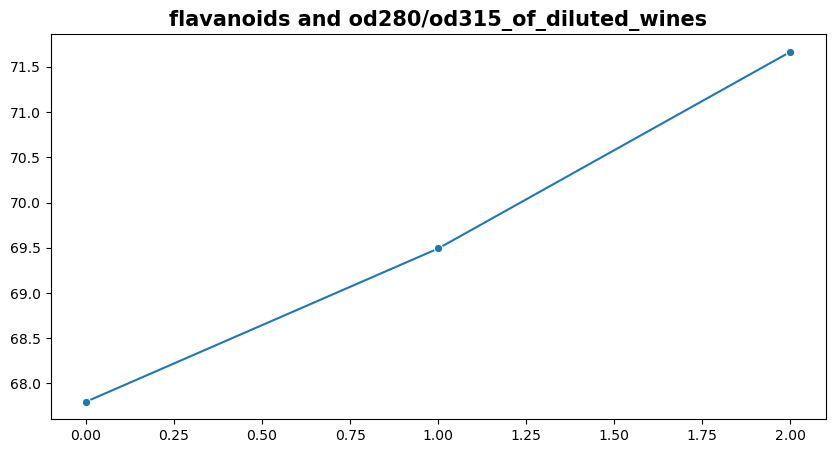

In [58]:
X = np.array(df[['flavanoids', 'od280/od315_of_diluted_wines']])
y = np.array(df['Target'])

model = KNN()
data = cross_validation(X, y, model, k=3)
plt.figure(figsize=(10, 5))
sns.lineplot(data['accuracies'], marker='o')
plt.title('flavanoids and od280/od315_of_diluted_wines', size=15, weight='bold')
plt.show()

no big difference, so, let's skip this

<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" > Scenario 2:  flavanoids and od280/od315_of_diluted_wines + total_phenols (3 features)</div>

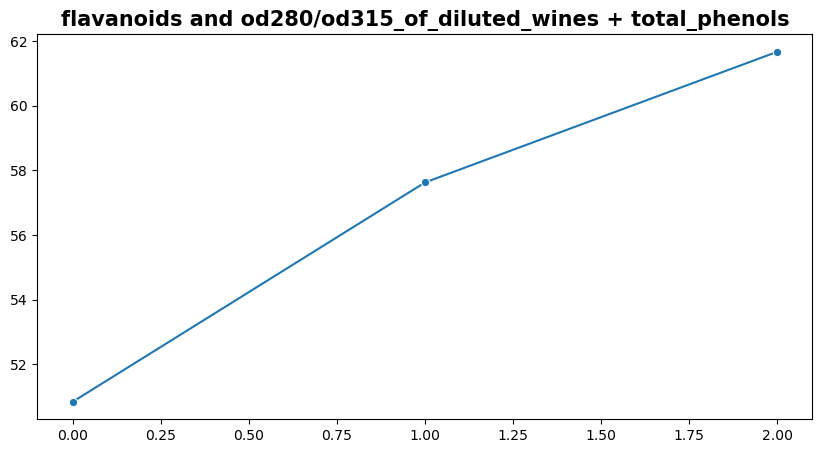

In [59]:
X = np.array(df[['flavanoids', 'od280/od315_of_diluted_wines', 'total_phenols']])
y = np.array(df['Target'])

model = KNN()
data = cross_validation(X, y, model, k=3)
plt.figure(figsize=(10, 5))
sns.lineplot(data['accuracies'], marker='o')
plt.title('flavanoids and od280/od315_of_diluted_wines + total_phenols', size=15, weight='bold')
plt.show()

well, it's better to use only 2 features

<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" > Scenario 3:  proline and magnesium (variance analysis)</div>

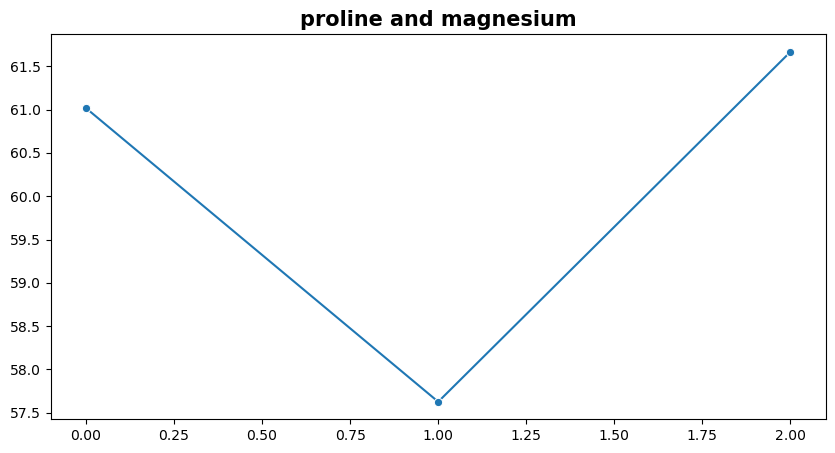

In [60]:
X = np.array(df[['proline', 'magnesium']])
y = np.array(df['Target'])

model = KNN()
data = cross_validation(X, y, model, k=3)
plt.figure(figsize=(10, 5))
sns.lineplot(data['accuracies'], marker='o')
plt.title('proline and magnesium', size=15, weight='bold')
plt.show()

the accuracy of variance analysis' features is lower than the corr analysis' features

<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" > Scenario 4:  proline and alcohol</div>

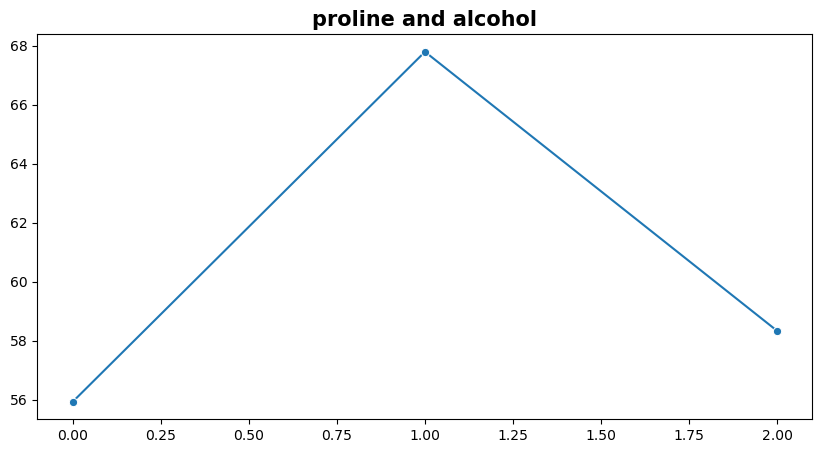

In [61]:
X = np.array(df[['proline', 'alcohol']])
y = np.array(df['Target'])

model = KNN()
data = cross_validation(X, y, model, k=3)
plt.figure(figsize=(10, 5))
sns.lineplot(data['accuracies'], marker='o')
plt.title('proline and alcohol', size=15, weight='bold')
plt.show()

mutual information features' accuracy is also lower than corr analysis' feature

<div style="background-color:white; font-size:15; color:red; border-radius:10px; border: 1px solid red; padding:23px;   font-family:'Poppins';" > Scenario 5: Search for the best K and Distance</div>

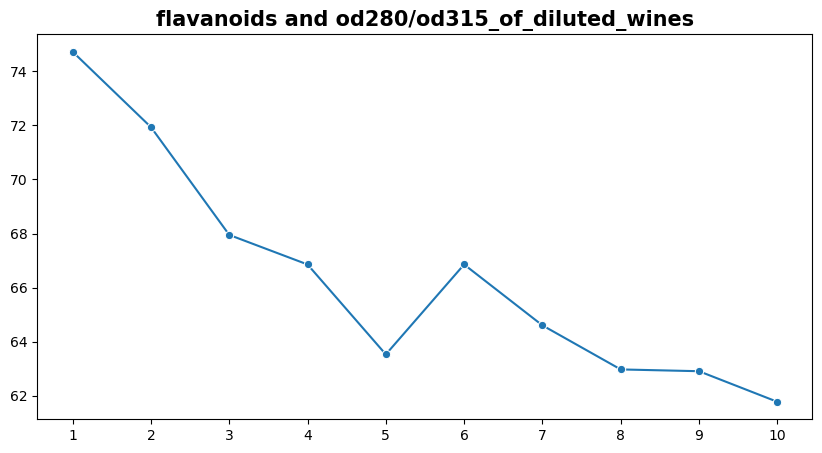

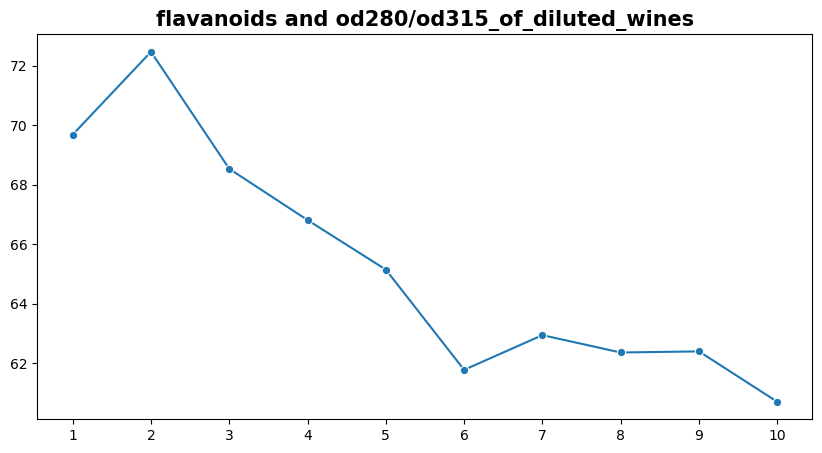

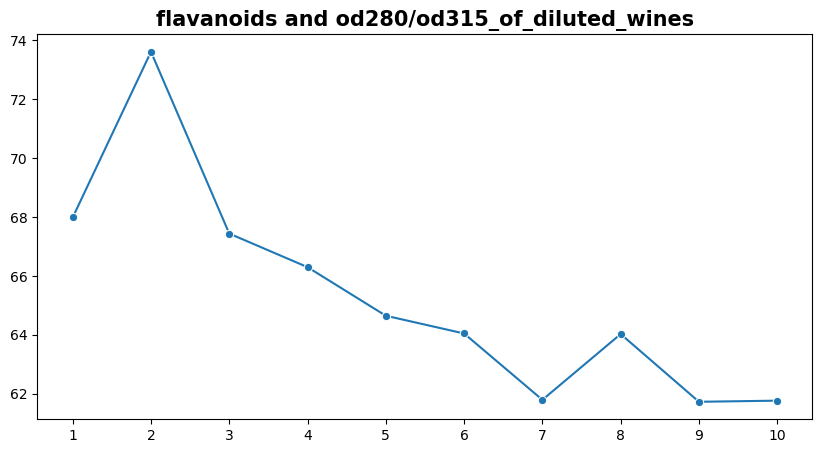

In [62]:
X = np.array(df[['flavanoids', 'od280/od315_of_diluted_wines']])
y = np.array(df['Target'])
for i in range(3):
    accuracies = []
    for neighbor in range(1, 11):
        model = KNN(k=neighbor)
        data = cross_validation(X, y, model, k=3)
        accuracies.append(np.mean(data['accuracies']))
    plt.figure(figsize=(10, 5))
    sns.lineplot(accuracies, marker='o')
    plt.xticks(range(0, 10, 1), range(1, 11, 1))
    plt.title('flavanoids and od280/od315_of_diluted_wines', size=15, weight='bold')
    plt.show()

after several run, 2 has the highest, yet, even number could give a tie, and 1 is too bias, let's pick 3 instead

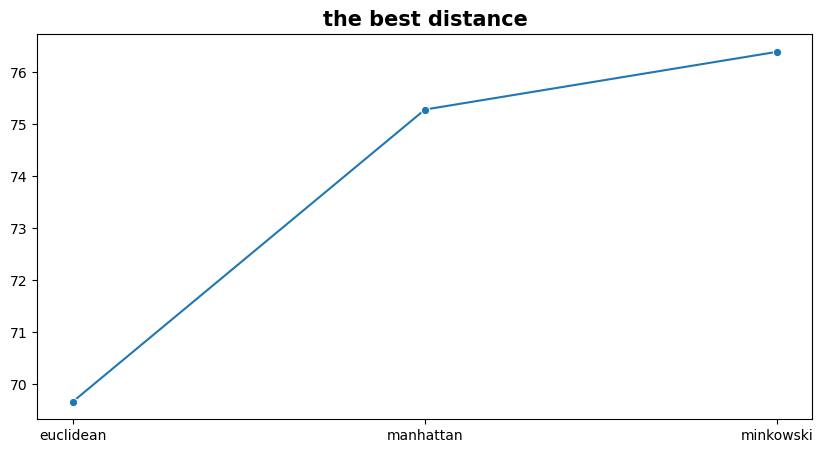

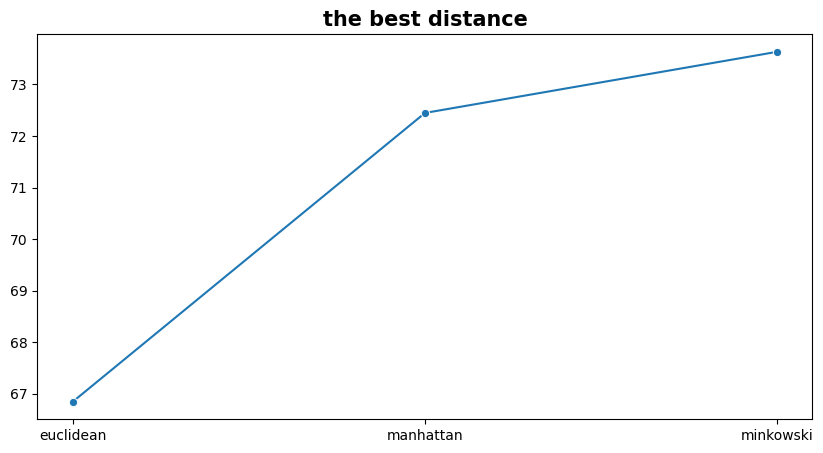

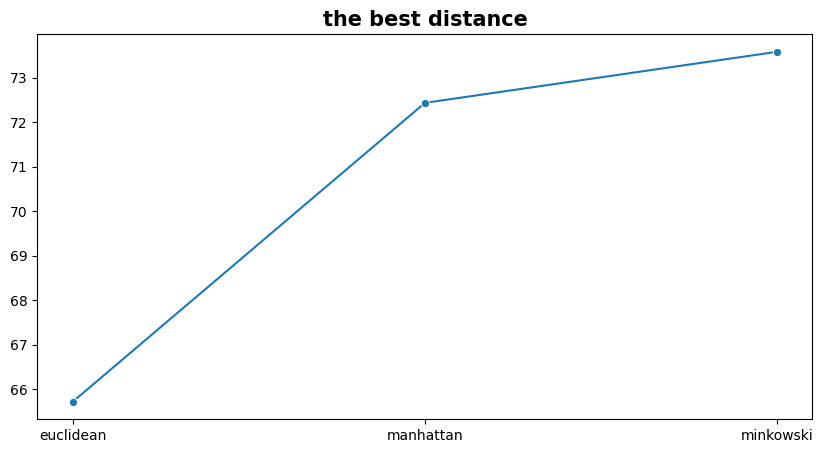

In [63]:
X = np.array(df[['flavanoids', 'od280/od315_of_diluted_wines']])
y = np.array(df['Target'])
for i in range(3):
    accuracies = []
    for distance in [euclidean, manhattan, minkowski]:
        model = KNN(k=3, distance=distance)
        data = cross_validation(X, y, model, k=3)
        accuracies.append(np.mean(data['accuracies']))
    plt.figure(figsize=(10, 5))
    sns.lineplot(accuracies, marker='o')
    plt.xticks(range(0, 3, 1), ['euclidean', 'manhattan', 'minkowski'])
    plt.title('the best distance', size=15, weight='bold')
    plt.show()

`manhattan` distance give higher accuracy than all

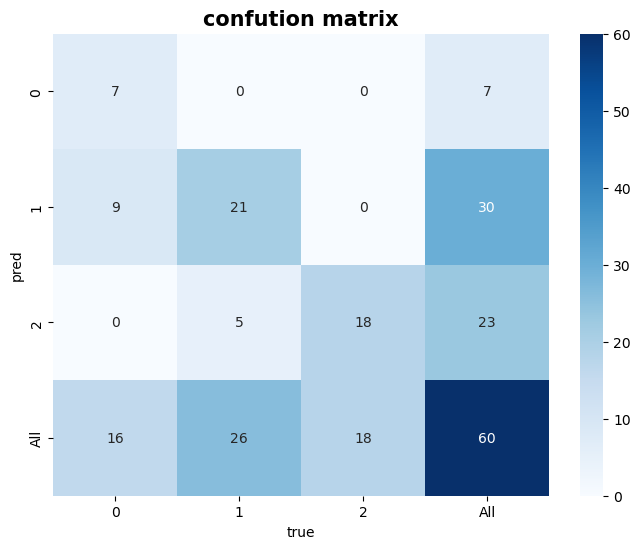

In [64]:
X = np.array(df[['flavanoids', 'od280/od315_of_diluted_wines']])
y = np.array(df['Target'])
model = KNN(k=3, distance=distance)
data = cross_validation(X, y, model, k=3)
y_pred = data['y_pred']
test_labels = pd.DataFrame(list(zip(y_pred, data['y_test'])), columns=['pred', 'true'])
crosstab = pd.crosstab(test_labels['pred'], test_labels['true'], margins=True)

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='d')
plt.title('confution matrix', size=15, weight='bold')
plt.show()

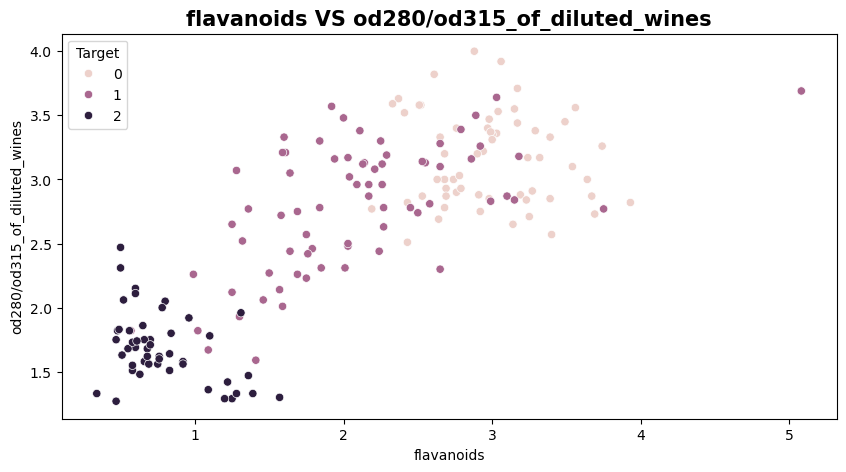

In [65]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='flavanoids', y='od280/od315_of_diluted_wines', hue='Target')
plt.title('flavanoids VS od280/od315_of_diluted_wines', size=15, weight='bold')
plt.show()

- label 0 is often classified as label 1
- label 1 are mostly true
- label 2 is the easiest to be classified

<div style="background-color:white; font-size:15px; color:red; border-radius:15px; padding:23px; font-family:'Poppins';" >Conclusion 🔥</div>

- The best feature pair to predict is `flavanoids` and `od280/od315_of_diluted_wines`
- the best k is 3
- the best distance is manhattan
- the easiest label to classify is 2

In [66]:
class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.mean = None
        self.components = None 
        self.explained_variance = None 
        
    def fit(self, X):
        self.mean = X.mean()
        X = X - self.mean #centering all the data in X to the perpendicular point of X axis and Y axis
        
        cov = np.cov(X.T) #getting all the covariances of all the features
        
        eigenvalues, eigenvector = np.linalg.eig(cov)
        # eigenvalues is new axes after (including the length)
        # eigenvetor is the direction (tendency or slope)
        
        indices = np.argsort(eigenvalues)[::-1] # sorting the eigenvalues based on the biggest
        eigenvalues = eigenvalues[indices]
        eigenvector = eigenvector[:, indices]
        
        self.components = eigenvector[:, :self.n_components]
        self.explained_variance = eigenvalues
        
    def transform(self, X):
        X -= self.mean 
        return np.dot(X, self.components)

In [67]:
pca = PCA(2)
X = np.array(df.drop('Target', axis=1))
pca.fit(X)

In [68]:
pca.components

array([[-1.65925482e-03,  1.18114846e-03],
       [ 6.81047031e-04,  2.05648625e-03],
       [-1.94903966e-04,  4.58843640e-03],
       [ 4.67131857e-03,  2.63659619e-02],
       [-1.78680081e-02,  9.99305204e-01],
       [-9.89840400e-04,  9.14975185e-04],
       [-1.56731078e-03,  2.35897305e-05],
       [ 1.23088545e-04, -1.36061677e-03],
       [-6.00616466e-04,  5.03276639e-03],
       [-2.32710093e-03,  1.49792560e-02],
       [-1.71384857e-04, -7.47069458e-04],
       [-7.04947159e-04, -3.44439992e-03],
       [-9.99821336e-01, -1.77899638e-02],
       [ 7.46764951e-06, -1.14232090e-03],
       [ 1.78874870e-03, -9.20118584e-03]])

In [69]:
pca.explained_variance 

array([9.92021069e+04, 1.72549669e+02, 1.07584238e+01, 6.58560961e+00,
       3.00254318e+00, 8.50768790e-01, 3.17102783e-01, 2.72465196e-01,
       1.51153102e-01, 1.12047833e-01, 6.88521461e-02, 3.73660977e-02,
       2.10392901e-02, 8.15564895e-03, 8.49458069e-06])

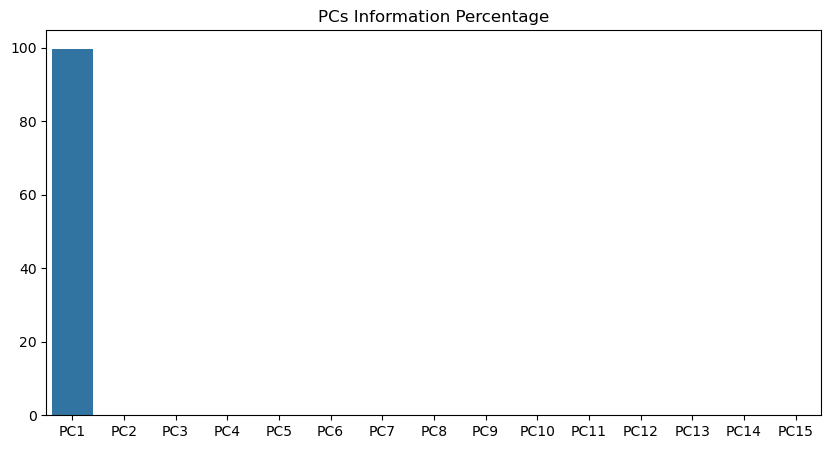

In [70]:
variance_ratio = pca.explained_variance / np.sum(pca.explained_variance) * 100
plt.figure(figsize=(10, 5))
sns.barplot(variance_ratio)
plt.title('PCs Information Percentage')
plt.xticks(range(0, len(variance_ratio), 1), [ f'PC{i}' for i in range(1, len(variance_ratio)+1) ])
plt.show()

In [71]:
transformed = pca.transform(X)
transformed


array([[-1005.87817995,    47.18426978],
       [ -990.41249026,    20.32835972],
       [-1125.37583802,    19.15201372],
       [-1420.55467585,    25.87834494],
       [ -675.74357748,    44.18364254],
       [-1390.54584708,    25.35456713],
       [-1230.28609342,    12.1690507 ],
       [-1235.71615977,    37.13511192],
       [ -985.35211035,    17.51361969],
       [ -985.36501849,    18.59301603],
       [-1450.39403611,    17.35035731],
       [-1220.25799418,    11.40163335],
       [-1260.14908102,     4.68369853],
       [-1090.24058359,     9.59069033],
       [-1487.36790364,    13.56735851],
       [-1250.56027342,    27.90258595],
       [-1220.69441291,    36.49271779],
       [-1070.63286114,    34.16934113],
       [-1620.43287966,    17.32944798],
       [ -785.71789963,    40.08442473],
       [ -720.90933055,    51.26512777],
       [ -710.46028921,    27.5055832 ],
       [ -975.4081231 ,    21.72987095],
       [ -955.29658503,    16.12235481],
       [ -785.33

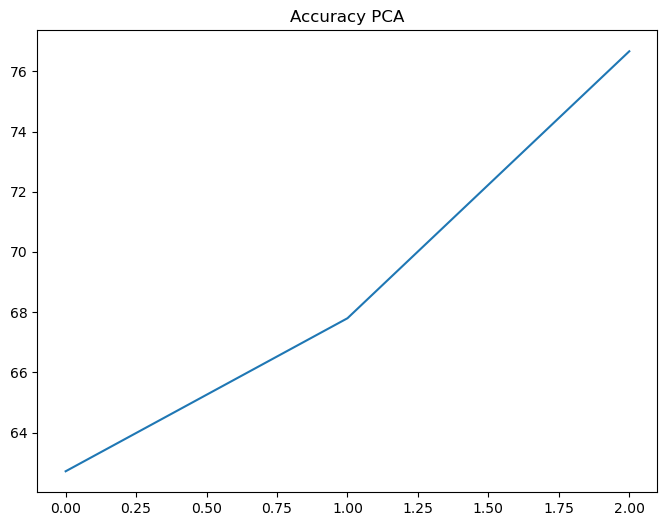

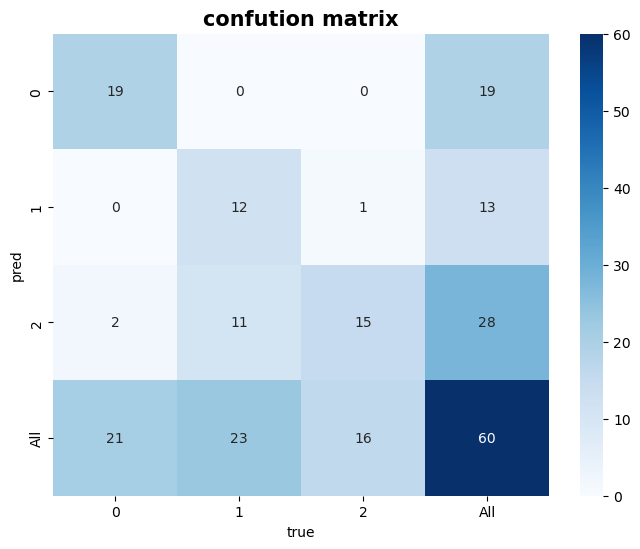

In [72]:
X = np.array(transformed)
y = np.array(df['Target'])
model = KNN(k=3, distance=distance)
data = cross_validation(X, y, model, k=3)
y_pred = data['y_pred']
test_labels = pd.DataFrame(list(zip(y_pred, data['y_test'])), columns=['pred', 'true'])
crosstab = pd.crosstab(test_labels['pred'], test_labels['true'], margins=True)
plt.figure(figsize=(8, 6))
sns.lineplot(data['accuracies'])
plt.title('Accuracy PCA')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='d')
plt.title('confution matrix', size=15, weight='bold')
plt.show()

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.030000,12.362500,13.050000,13.677500,14.830000
malic_acid,178.0,2.336348,1.117146,0.740000,1.602500,1.865000,3.082500,5.800000
ash,178.0,2.366517,0.274344,1.360000,2.210000,2.360000,2.557500,3.230000
alcalinity_of_ash,178.0,19.494944,3.339564,10.600000,17.200000,19.500000,21.500000,30.000000
magnesium,178.0,99.741573,14.282484,70.000000,88.000000,98.000000,107.000000,162.000000
total_phenols,178.0,2.295112,0.625851,0.980000,1.742500,2.355000,2.800000,3.880000
flavanoids,178.0,2.029270,0.998859,0.340000,1.205000,2.135000,2.875000,5.080000
nonflavanoid_phenols,178.0,0.361854,0.124453,0.130000,0.270000,0.340000,0.437500,0.660000
proanthocyanins,178.0,1.590899,0.572359,0.410000,1.250000,1.555000,1.950000,3.580000
color_intensity,178.0,5.058090,2.318286,1.280000,3.220000,4.690000,6.200000,13.000000


<div style="background-color:red; font-size:30px; border-radius:15px; padding:23px; text-align:center; font-family:'Poppins'; color:white;" > 3 | End Product - Visualization </div>

- **App Description:** Sebuah aplikasi desktop untuk Toko Wine dalam melihat kualitas wine, berdasarkan , 
- **Pengguna Aplikasi:** aplkasi ini digunakan oleh QC saat wine baru masuk ke toko untuk dijual

In [ ]:
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import messagebox, ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
import seaborn as sns

class WineQualityPredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("WineQualityPredictionApp")
        self.root.attributes('-fullscreen', True)
        self.history_file = 'history.pkl'
        self.history = self.load_history_from_pickle()
        
        self.tab_control = ttk.Notebook(root)
        self.predict_tab = ttk.Frame(self.tab_control,padding="30")
        self.history_tab = ttk.Frame(self.tab_control, padding="30")
        self.setting_tab = ttk.Frame(self.tab_control, padding="30")
        
        style = ttk.Style()
        style.configure('TNotebook.Tab', padding=[40, 15], font=('Roboto', 15))
        
        self.tab_control.add(self.predict_tab, text="Predict")
        self.tab_control.add(self.history_tab, text="History")
        self.tab_control.add(self.setting_tab, text="Settings")
        self.tab_control.pack(fill='x')
        
        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()

    
    def init_predict_tab(self):
        ttk.Label(self.predict_tab, text="Quality Wine Classification", font=('Roboto', 20)).grid(row=0, column=0, sticky='w')
        ttk.Label(self.predict_tab, text="Check your quality of wine", font=('Roboto', 12)).grid(row=1, column=0, sticky='w')
        
        self.frame_input = ttk.Frame(self.predict_tab)
        self.frame_input.grid(row=2, column=0, sticky='w',)

        ttk.Label(self.frame_input, text="Falvonaids", font=('Poppins', 15)).grid(column=0, row=0, sticky='w', padx=10)
        self.input1 = ttk.Entry(self.frame_input, font=('Poppins', 15))
        self.input1.grid(row=1, column=0, sticky='w', padx=10)
        ttk.Label(self.frame_input, text="Range of proline", font=('Poppins light', 12)).grid(column=0, row=2, sticky='w', padx=10)
        
        ttk.Label(self.frame_input, text="Diluted wines", font=('Poppins', 15)).grid(column=1, row=0, sticky='w', padx=10)
        self.input2 = ttk.Entry(self.frame_input, font=('Poppins', 15))
        self.input2.grid(row=1, column=1, sticky='w', padx=10)
        ttk.Label(self.frame_input, text="Range of proline", font=('Poppins light', 12)).grid(column=1, row=2, sticky='w', padx=10)
        
        self.figure = plt.Figure(figsize=(7,5), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.canvas = FigureCanvasTkAgg(self.figure, self.predict_tab)
        self.canvas.get_tk_widget().grid(column=0, row=4, columnspan=4)
        
        ttk.Button(self.predict_tab, text="Predict", command=self.predict_and_plot, padding="40 20 40 20").grid(column=3, row=2, sticky='e', )

        
    # history file = timestamp, quality, wine_label, scenario, first_dependent, second_dependent, third_dependent, first_value, second_value, third_value, distance, k, accuracy
    def init_history_tab(self):
        ttk.Label(self.predict_tab, text="Quality Wine Classification", font=('Roboto', 20)).grid(row=0, column=0, sticky='w')
        ttk.Label(self.predict_tab, text="Check your quality of wine", font=('Roboto', 12)).grid(row=1, column=0, sticky='w')
        
        self.history_frame = ttk.Frame(self.history_tab)
        self.history_frame.grid(row=2,column= 0, sticky='w',)
        self.history_tree = ttk.Treeview(master=self.history_frame, column=(['timestamp', 'wine_label', 'quality', 'scenario']))
        self.history_tree.heading('timestamp', text='Timestamp')
        self.history_tree.heading('wine_label', text='Label Wine')
        self.history_tree.heading('quality', text='Quality Prediction')
        self.history_tree.heading('scenario', text="Scenario")
        self.history_tree.grid(row=2, column=0)
        
        ttk.Button(self.history_tab, command=self.compare_history, text="Compare History", padding="50 0 50 0").grid(row=3, column=0, pady=10, sticky='e')
        
        self.compare_frame = ttk.Frame(self.history_tab)
        self.compare_frame.grid(column=0, row=4, sticky='w')
 
        
    def predict_and_plot(self):
        
        self.ax.clear()
        
        if self.scenario_select.get() == 'Best':
            X = np.array(df[['flavanoids', 'od280/od315_of_diluted_wines']])
            sns.scatterplot(data=df, x='flavanoids', y='od280/od315_of_diluted_wines', hue='Target',  ax=self.ax)
            plt.title(f'flavanoids VS od280/od315_of_diluted_wines', size=15, weight='bold')
            
        elif self.scenario_select.get() == 'Medium':
            X = np.array(df[['proline', 'magnesium']])
            sns.scatterplot(data=df, x='proline', y='magnesium', hue='Target', ax=self.ax)
            plt.title(f'proline VS magnesium', size=15, weight='bold')
            
        elif self.scenario_select.get() == 'Low':
            X = np.array(df[['proline', 'alcohol']])
            sns.scatterplot(data=df, x='proline', y='alcohol', hue='Target', ax=self.ax)
            plt.title(f'proline VS alcohol', size=15, weight='bold')

        y = np.array(df['Target'])
        
        distances = {
            'Minkowski': minkowski,
            'Manhattan': manhattan,
            'Euclidean': euclidean
        }.get(self.distance_select.get(), minkowski)
            
        model = KNN(k=int(self.k_input.get()), distance=distances)
        data = cross_validation(X, y, model, k=3)
        model.fit(X, y)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], marker='X', color='red', ax=self.ax, label='Prediction')
        input2_value = float(self.input2.get())
        input1_value = float(self.input1.get())
        predict = model.predict([[input1_value, input2_value]])
        predict_detail = model._predict([[input1_value, input2_value]])
        self.ax.legend()
        self.canvas.draw()
        sns.scatterplot(x=input1_value, y=input2_value, marker='X', color='red', ax=self.ax, label='Prediction')
        # history file = timestamp, category, wine_label, scenario, first_dependent, second_dependent, first_value, second_value, distance, k, accuracy

        new_row = pd.DataFrame({
            'timestamp': [pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')],
            'category': [predict],
            'category_detail': [predict_detail],
            'scenario': [self.scenario_select.get()],
            'input1_label': [self.input1_label],
            'input2_label': [self.input2_label],
            'input1_value': [self.input1_value.get()],
            'input2_value': [self.input2_value.get()],
            'distance': [self.distance_select.get()],
            'k_value': [self.k_input.get()],
            'accuracy': [self.alpha_entry_var.get() ],
        })
        self.history = pd.concat([self.history, new_row], ignore_index=True)
        
        
        ttk.Label(self.compare_frame, text="Compare 1", font=('Poppins semibold', 20)).grid(column=0,row=0, sticky='w')

        ttk.Label(self.compare_frame, text="Timestamp", font=('Poppins medium', 12)).grid(column=0, row=1, sticky='w')
        ttk.Label(self.compare_frame, text=new_row['timestamp'], font=('Poppins', 15)).grid(column=0, row=2, sticky='w')
        ttk.Label(self.compare_frame, text="Category Prediction", font=('Poppins medium', 12)).grid(column=0, row=1, sticky='w', padx=(230, 0))
        ttk.Label(self.compare_frame, text=new_row['category'], font=('Poppins', 15)).grid(column=0, row=2, sticky='w', padx=(230, 0))
        
        ttk.Label(self.compare_frame, text="Categroy Detail", font=('Poppins medium', 12)).grid(column=0, row=3, sticky='w')
        ttk.Label(self.compare_frame, text=new_row[''], font=('Poppins', 15)).grid(column=0, row=4, sticky='w')
        ttk.Label(self.compare_frame, text="Wine Label", font=('Poppins medium', 12)).grid(column=0, row=3, sticky='w', padx=(230, 0))
        ttk.Label(self.compare_frame, text=new_row[''], font=('Poppins', 15)).grid(column=0, row=4, sticky='w', padx=(230, 0))
        
        # Y Dependent Value
        ttk.Label(self.compare_frame, text={'flavonoids'}, font=('Poppins medium', 12)).grid(column=0, row=5, sticky='w')
        ttk.Label(self.compare_frame, text=new_row[''], font=('Poppins', 15)).grid(column=0, row=6, sticky='w')
        ttk.Label(self.compare_frame, text="X Dependent Value", font=('Poppins light', 10)).grid(column=0, row=7, sticky='w')
        
        # X Dependent Value
        ttk.Label(self.compare_frame, text={'flavonoids'}, font=('Poppins medium', 12)).grid(column=0, row=5, sticky='w', padx=(230, 0))
        ttk.Label(self.compare_frame, text=new_row[''], font=('Poppins', 15)).grid(column=0, row=6, sticky='w', padx=(230, 0))
        ttk.Label(self.compare_frame, text="Y Dependent Value", font=('Poppins light', 10)).grid(column=0, row=7, sticky='w', padx=(230, 0))
        
        ttk.Label(self.compare_frame, text="Scenario", font=('Poppins medium', 12)).grid(column=0, row=8, sticky='w')
        ttk.Label(self.compare_frame, text=new_row[''], font=('Poppins', 15)).grid(column=0, row=9, sticky='w')
        ttk.Label(self.compare_frame, text="Distance", font=('Poppins medium', 12)).grid(column=0, row=8, sticky='w', padx=(230, 0))
        ttk.Label(self.compare_frame, text=new_row[''], font=('Poppins', 15)).grid(column=0, row=9, sticky='w', padx=(230, 0))
        
        ttk.Label(self.compare_frame, text="K Value", font=('Poppins medium', 12)).grid(column=0, row=10, sticky='w')
        ttk.Label(self.compare_frame, text=new_row[''], font=('Poppins', 15)).grid(column=0, row=11, sticky='w')
        ttk.Label(self.compare_frame, text="Accuracy", font=('Poppins medium', 12)).grid(column=0, row=10, sticky='w', padx=(230, 0))
        ttk.Label(self.compare_frame, text=new_row[''], font=('Poppins', 15)).grid(column=0, row=11, sticky='w', padx=(230, 0))
        
        self.update_history()
        self.save_to_pickle() 
        plt.show()  
            
    def compare_history(self):
        self.selected_item = self.history_tree.selection()
        
        if len(self.selected_item) != 2:
            messeagebox.showerror("Error", "please select exact 2 for comparation")
            
        item1 = self.history_tree.item(self.selected_item[0], 'values')
        item2 = self.history_tree.item(self.selected_item[1], 'values')
        
        self.compare1 = ttk.Frame(self.compare_frame)
        self.compare1.grid(column=0, row=0,sticky='w',)
        # history file = timestamp, quality, wine_label, scenario, first_dependent, second_dependent, third_dependent, first_value, second_value, third_value, distance, k, accuracy, cluster
        
        # COMPARE 1 =============================================================================================
        ttk.Label(self.compare1, text="Compare 1", font=('Poppins semibold', 20)).grid(column=0,row=0, sticky='w')

        ttk.Label(self.compare1, text="Timestamp", font=('Poppins medium', 12)).grid(column=0, row=7, sticky='w')
        ttk.Label(self.compare1, text=item1, font=('Poppins', 15)).grid(column=0, row=8, sticky='w')
        ttk.Label(self.compare1, text="Category Prediction", font=('Poppins medium', 12)).grid(column=0, row=7, sticky='w', padx=(230, 0))
        ttk.Label(self.compare1, text=item1, font=('Poppins', 15)).grid(column=0, row=8, sticky='w', padx=(230, 0))
        
        ttk.Label(self.compare1, text="Categroy Detail", font=('Poppins medium', 12)).grid(column=0, row=9, sticky='w')
        ttk.Label(self.compare1, text=item1, font=('Poppins', 15)).grid(column=0, row=10, sticky='w')
        ttk.Label(self.compare1, text="Wine Label", font=('Poppins medium', 12)).grid(column=0, row=9, sticky='w', padx=(230, 0))
        ttk.Label(self.compare1, text=item1, font=('Poppins', 15)).grid(column=0, row=10, sticky='w', padx=(230, 0))
        
        # Y Dependent Value
        ttk.Label(self.compare1, text={'flavonoids'}, font=('Poppins medium', 12)).grid(column=0, row=4, sticky='w')
        ttk.Label(self.compare1, text=item1, font=('Poppins', 15)).grid(column=0, row=5, sticky='w')
        ttk.Label(self.compare1, text="X Dependent Value", font=('Poppins light', 10)).grid(column=0, row=6, sticky='w')
        
        # X Dependent Value
        ttk.Label(self.compare1, text={'flavonoids'}, font=('Poppins medium', 12)).grid(column=0, row=5, sticky='w', padx=(230, 0))
        ttk.Label(self.compare1, text=item1, font=('Poppins', 15)).grid(column=0, row=5, sticky='w', padx=(230, 0))
        ttk.Label(self.compare1, text="Y Dependent Value", font=('Poppins light', 10)).grid(column=0, row=6, sticky='w', padx=(230, 0))
        
        ttk.Label(self.compare1, text="Scenario", font=('Poppins medium', 12)).grid(column=0, row=11, sticky='w')
        ttk.Label(self.compare1, text=item1, font=('Poppins', 15)).grid(column=0, row=12, sticky='w')
        ttk.Label(self.compare1, text="Distance", font=('Poppins medium', 12)).grid(column=0, row=11, sticky='w', padx=(230, 0))
        ttk.Label(self.compare1, text=item1, font=('Poppins', 15)).grid(column=0, row=12, sticky='w', padx=(230, 0))
        
        ttk.Label(self.compare1, text="K Value", font=('Poppins medium', 12)).grid(column=0, row=13, sticky='w')
        ttk.Label(self.compare1, text=item1, font=('Poppins', 15)).grid(column=0, row=14, sticky='w')
        ttk.Label(self.compare1, text="Accuracy", font=('Poppins medium', 12)).grid(column=0, row=13, sticky='w', padx=(230, 0))
        ttk.Label(self.compare1, text=item1, font=('Poppins', 15)).grid(column=0, row=14, sticky='w', padx=(230, 0))

        # COMPARE 2 =============================================================================================
        
        self.compare2 = ttk.Frame(self.compare_frame)
        self.compare2.grid(column=3, row=0, padx=(50, 0))
        # history file = timestamp, quality, wine_label, scenario, first_dependent, second_dependent, third_dependent, first_value, second_value, third_value, distance, k, accuracy, cluster
        
        # COMPARE 1 =============================================================================================
        ttk.Label(self.compare2, text="Compare 2", font=('Poppins semibold', 20)).grid(column=0,row=0, sticky='w')
        # Z Dependent Value
        ttk.Label(self.compare2, text={'flavonoids'}, font=('Poppins medium', 12)).grid(column=0, row=1, sticky='w')
        ttk.Label(self.compare2, text=item2, font=('Poppins', 15)).grid(column=0, row=2, sticky='w')
        ttk.Label(self.compare2, text="X Dependent Value", font=('Poppins light', 10)).grid(column=0, row=3, sticky='w')
        
        # Y Dependent Value
        ttk.Label(self.compare2, text={'flavonoids'}, font=('Poppins medium', 12)).grid(column=0, row=4, sticky='w')
        ttk.Label(self.compare2, text=item2, font=('Poppins', 15)).grid(column=0, row=5, sticky='w')
        ttk.Label(self.compare2, text="X Dependent Value", font=('Poppins light', 10)).grid(column=0, row=6, sticky='w')
        
        # X Dependent Value
        ttk.Label(self.compare2, text={'flavonoids'}, font=('Poppins medium', 12)).grid(column=0, row=5, sticky='w', padx=(230, 0))
        ttk.Label(self.compare2, text=item2, font=('Poppins', 15)).grid(column=0, row=5, sticky='w', padx=(230, 0))
        ttk.Label(self.compare2, text="X Dependent Value", font=('Poppins light', 10)).grid(column=0, row=6, sticky='w', padx=(230, 0))
        
        ttk.Label(self.compare2, text="Timestamp", font=('Poppins medium', 12)).grid(column=0, row=7, sticky='w')
        ttk.Label(self.compare2, text=item2, font=('Poppins', 15)).grid(column=0, row=8, sticky='w')
        ttk.Label(self.compare2, text="Quality Prediction", font=('Poppins medium', 12)).grid(column=0, row=7, sticky='w', padx=(230, 0))
        ttk.Label(self.compare2, text=item2, font=('Poppins', 15)).grid(column=0, row=8, sticky='w', padx=(230, 0))
        
        ttk.Label(self.compare2, text="Wine Label", font=('Poppins medium', 12)).grid(column=0, row=9, sticky='w')
        ttk.Label(self.compare2, text=item2, font=('Poppins', 15)).grid(column=0, row=10, sticky='w')
        ttk.Label(self.compare2, text="Scenario Number", font=('Poppins medium', 12)).grid(column=0, row=9, sticky='w', padx=(230, 0))
        ttk.Label(self.compare2, text=item2, font=('Poppins', 15)).grid(column=0, row=10, sticky='w', padx=(230, 0))
        
        ttk.Label(self.compare2, text="Distance", font=('Poppins medium', 12)).grid(column=0, row=11, sticky='w')
        ttk.Label(self.compare2, text=item2, font=('Poppins', 15)).grid(column=0, row=12, sticky='w')
        ttk.Label(self.compare2, text="K", font=('Poppins medium', 12)).grid(column=0, row=11, sticky='w', padx=(230, 0))
        ttk.Label(self.compare2, text=item2, font=('Poppins', 15)).grid(column=0, row=12, sticky='w', padx=(230, 0))
        
        ttk.Label(self.compare2, text="Accuracy", font=('Poppins medium', 12)).grid(column=0, row=13, sticky='w')
        ttk.Label(self.compare2, text=item2, font=('Poppins', 15)).grid(column=0, row=14, sticky='w')
        ttk.Label(self.compare2, text="Spread Data", font=('Poppins medium', 12)).grid(column=0, row=13, sticky='w', padx=(230, 0))
        ttk.Label(self.compare2, text=item2, font=('Poppins', 15)).grid(column=0, row=14, sticky='w', padx=(230, 0))
        
    def init_setting_tab(self):
        ttk.Label(self.setting_tab, text="Quality Wine Classification", font=('Roboto', 20)).grid(row=0,column=0, sticky='w')
        ttk.Label(self.setting_tab, text="Check your quality of wine", font=('Roboto', 12)).grid(row=1,column=0, sticky='w')   
        
        self.scenario_input_frame = ttk.Frame(self.setting_tab)
        self.scenario_input_frame.grid(column=0, row=2)
        # Select scenario, input what kind of parameter
        ttk.Label(self.scenario_input_frame,text="Scenario Settings", font=('Poppins medium', 32)).grid(column=0, row=0, sticky='w')
        
        ttk.Label(self.scenario_input_frame,text="Chosee Scenario", font=('Poppins', 15)).grid(column=0, row=2, sticky='w')
        self.scenario_select_var = tk.StringVar(value='Best')
        self.scenario_select = ttk.Combobox(self.scenario_input_frame, values=['Best', 'Medium', 'Low' ], textvariable=self.scenario_select_var, font=('Poppins', 16))
        self.scenario_select.grid(column=0, row=3, sticky='w')
        ttk.Label( self.scenario_input_frame, text="Chosee your input, which best, medium, or low",font=('Poppins', 12)).grid(column=0, row=4, sticky='w')
        self.scenario_select.bind("<<ComboboxSelected>>", self.update_setting)
        
        self.scenario_frame = ttk.Frame(self.setting_tab)
        self.scenario_frame.grid(column=0, row=5, sticky='w')
        
        ttk.Label(self.scenario_frame, text="Input 1", font=('Poppins medium', 12)).grid(column=0, row=5, sticky='w')
        ttk.Label(self.scenario_frame, text="Falvonaids", font=('Poppins', 15)).grid(column=0, row=6, sticky='w')
        ttk.Label(self.scenario_frame, text="Input 2", font=('Poppins medium', 12)).grid(column=0, row=5, sticky='w', padx=(230, 0))
        ttk.Label(self.scenario_frame, text="Diluted wines", font=('Poppins', 15)).grid(column=0, row=6, sticky='w', padx=(230, 0))
        
        # Setting Frame
        self.setting_frame = ttk.Frame(self.setting_tab)
        self.setting_frame.grid(column=4, row=2, padx=(100, 0))
        
        ttk.Label(self.setting_frame,text="Model Settings", font=('Poppins medium', 32)).grid(column=0, row=2, sticky='w')
        
        ttk.Label(self.setting_frame,text="Chosee Distance", font=('Poppins', 15)).grid(column=0, row=3, sticky='w')
        self.distance_select_var = tk.StringVar(value='Minkowski')
        self.distance_select = ttk.Combobox(self.setting_frame, values=['Minkowski', 'Manhattan', 'Euclidean' ], textvariable=self.distance_select_var, font=('Poppins', 16))
        self.distance_select.grid(column=0, row=4, sticky='w')
        
        ttk.Label(self.setting_frame,text="Chosee Distance", font=('Poppins', 15)).grid(column=0, row=5, sticky='w')
        self.k_input_var = tk.IntVar(value=3)
        self.k_input = ttk.Entry(self.setting_frame, textvariable=self.k_input_var,  font=('Poppins', 16))
        self.k_input.grid(column=0, row=6, sticky='w')
        
        ttk.Button(self.setting_frame, command=lambda x: messegebox.showinfo("Sucess", "Model setting has been updated")).grid(column=0, row=6)
            
    def update_setting(self, event=None):
        for widget in self.scenario_frame.winfo_children():
            widget.grid_forget()
            
        for widget in self.frame_input.winfo_children():
            widget.grid_forget()
            
        input_labels = {
            'Best': ('Falvonaids', 'Diluted wines'),
            'Medium': ('Proline', 'Magnesium'),
            'Low': ('Proline', 'Alcohol')
        }

        self.input1_label, self.input2_label = input_labels[self.scenario_select.get()]

        # Setting Page ==================
        ttk.Label(self.scenario_frame, text="Input 1", font=('Poppins medium', 12)).grid(column=0, row=5, sticky='w')
        ttk.Label(self.scenario_frame, text=self.input1_label, font=('Poppins', 15)).grid(column=0, row=6, sticky='w')
        ttk.Label(self.scenario_frame, text="Input 2", font=('Poppins medium', 12)).grid(column=0, row=5, sticky='w', padx=(230, 0))
        ttk.Label(self.scenario_frame, text=self.input2_label, font=('Poppins', 15)).grid(column=0, row=6, sticky='w', padx=(230, 0))

        # Predict page ====================
        ttk.Label(self.frame_input, text=self.input1_label, font=('Poppins', 15)).grid(column=0, row=0, sticky='w', padx=10)
        self.input1 = ttk.Entry(self.frame_input, font=('Poppins', 15))
        self.input1.grid(row=1, column=0, sticky='w', padx=10)
        ttk.Label(self.frame_input, text="Range of proline", font=('Poppins light', 12)).grid(column=0, row=2, sticky='w', padx=10)

        ttk.Label(self.frame_input, text=self.input2_label, font=('Poppins', 15)).grid(column=1, row=0, sticky='w', padx=10)
        self.input2 = ttk.Entry(self.frame_input, font=('Poppins', 15))
        self.input2.grid(row=1, column=1, sticky='w', padx=10)
        ttk.Label(self.frame_input, text="Range of proline", font=('Poppins light', 12)).grid(column=1, row=2, sticky='w', padx=10)
            
    def update_history(self):
        for item in self.history_tree.get_children():
            self.history_tree.delete(item)
        for index, row in self.history.iterrows():
            self.history_tree.insert('', 'end', values=(row['timestamp'],row['quality'],row['wine_label'],row['scenario'],row['first_dependent'],row['second_dependent'],row['third_dependent'],row['first_value'],row['second_value'],row['third_value'],row['distance'],row['k'],row['accuracy'],row['cluster']))
    
    def save_to_pickle(self):
        try:
            self.history.to_pickle(self.history_file)
        except Exception as e:
            messagebox.showerror("File Error", f'Failed to save: {e}')
            
    def load_history_from_pickle(self):
        try:
            if os.path.exists(self.history_file):
                return pd.read_pickle(self.history_file)
            else:
                return pd.DataFrame(columns=['timestamp',' quality',' wine_label',' scenario',' first_dependent',' second_dependent',' third_dependent',' first_value',' second_value',' third_value',' distance',' k',' accuracy',' cluster'])
        except Exception as e:
            messagebox.showerror("File Error", f'Failed to upload: {e}')
            return pd.DataFrame(columns=['timestamp',' quality',' wine_label',' scenario',' first_dependent',' second_dependent',' third_dependent',' first_value',' second_value',' third_value',' distance',' k',' accuracy',' cluster'])
            
if __name__ == "__main__":
    root = tk.Tk()
    app = WineQualityPredictionApp(root)
    root.mainloop()


: 